In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [39]:
# import pandas as pd

# # Read CSV file
# csv_file_path = r"C:\Users\aisha\Downloads\lagoes_adk_modified.csv"
# adk_data = pd.read_csv(csv_file_path)

# # Convert 'Permanent_' column to string type
# adk_data['Permanent_'] = adk_data['Permanent_'].astype(str)

# # Read Excel file and select only desired columns
# excel_file_path = r"C:\Users\aisha\Downloads\width.xlsx"
# excel_data = pd.read_excel(excel_file_path, usecols=['Permanent_', 'W', 'L', 'wkt_geom', 'GNIS_Name'])

# # Convert 'Permanent_' column to string type
# excel_data['Permanent_'] = excel_data['Permanent_'].astype(str)

# # Merge the data by adding the column from the Excel file to the CSV file
# merged_data = pd.merge(adk_data, excel_data, how='left', on='Permanent_')

# # Drop duplicates based on 'Permanent_' column keeping only the first occurrence
# filtered_data = merged_data.drop_duplicates(subset=['Permanent_'], keep='first')

# # Print or further manipulate the filtered data
# filtered_data

In [40]:
# # Drop all columns except specified ones
# filtered_data = merged_data[['Permanent_', 'nhd_lat', 'nhd_long', 'wkt_geom', 'GNIS_Name', 'W', 'L']].copy()

# # Rename columns
# filtered_data.rename(columns={'Permanent_': 'PERMANENT_ID', 'nhd_lat': 'Lat', 'nhd_long': 'Lon', 'GNIS_Name':'lake.name'}, inplace=True)

# # Drop duplicates
# filtered_data.drop_duplicates(inplace=True)

# # Drop rows with NaN values
# filtered_data.dropna(inplace=True)

# # Filter the DataFrame based on the condition "W" column > -200
# filtered_data = filtered_data[filtered_data['W'] >= 200]

# # Drop duplicates based on 'Permanent_' column keeping only the first occurrence
# filtered_data = filtered_data.drop_duplicates(subset=['PERMANENT_ID'], keep='first')

# filtered_data

In [41]:
# print("Number of unique IDs:", filtered_data['PERMANENT_ID'].nunique())

In [42]:
# Export to CSV
# filtered_data.to_csv(r"C:\Users\aisha\Downloads\filtered_data.csv", index=False)

In [43]:
import pandas as pd

# Read the CSV file
csv_file_path = r"C:\Users\aisha\Downloads\182_lakes_updated_coordinates.csv"
df = pd.read_csv(csv_file_path)
df

,PERMANENT_,Lat,Lon,wkt_geom,lake.name,W,L,Lattitude,Lattitude_,Longitude_
0,47725041,43.294298,-74.429060,MultiPolygonZ (((-74.42627387304082731 43.2907...,Silver Lake,287.819417,1125.357464,NaN,43.294298,-74.429060
1,131844984,43.712164,-74.798791,MultiPolygonZ (((-74.81091200369382932 43.7144...,Limekiln Lake,388.020140,4845.464230,NaN,43.712164,-74.798791
2,53542293,43.161608,-74.537847,MultiPolygonZ (((-74.51236279478223423 43.1737...,Canada Lake,278.716343,12952.276715,NaN,43.166322,-74.530215
3,120023153,43.411575,-74.549398,MultiPolygonZ (((-74.52257526143301902 43.4417...,Piseco Lake,673.910683,17113.456603,NaN,43.420732,-74.535786
4,53541207,43.330849,-75.065071,MultiPolygonZ (((-75.03157499397627817 43.3482...,Hinckley Reservoir,526.153990,20826.157470,NaN,43.336330,-75.075211
...,...,...,...,...,...,...,...,...,...,...
177,132436448,44.040612,-74.763285,MultiPolygonZ (((-74.76602599438848529 44.0412...,Clear Pond,361.155390,818.090152,NaN,44.040612,-74.763285
178,131841654,43.916438,-74.780530,MultiPolygonZ (((-74.7749319995829751 43.91922...,Shingle Shanty Pond,245.081753,1303.811637,NaN,43.916438,-74.780530
179,131846637,43.527324,-75.045971,MultiPolygonZ (((-75.04191795229354511 43.5296...,Chub Pond,280.100792,1172.480295,NaN,43.527324,-75.045971
180,53540721,43.400910,-74.703971,MultiPolygonZ (((-74.70791052781203234 43.4009...,The Floe,216.722771,1869.544017,NaN,43.400910,-74.703971


In [44]:
print("Number of unique IDs:", df['PERMANENT_'].nunique())

Number of unique IDs: 182


In [45]:
import pandas as pd

# Read the CSV file
csv_file_path = r"C:\Users\aisha\Downloads\182_lakes_updated_coordinates.csv"
lakes_182 = pd.read_csv(csv_file_path)

# Drop the 'Lat', 'Lon', and 'Lattitude' columns
lakes_182.drop(columns=['Lat', 'Lon', 'Lattitude', 'wkt_geom', 'W', 'L'], inplace=True)

# Rename columns
lakes_182.rename(columns={'PERMANENT_': 'PERMANENT_ID', 'Lattitude_': 'Lat', 'Longitude_': 'Lon', 'lake.name':'SITE_NAME'}, inplace=True)

# Print the resulting DataFrame
lakes_182

,PERMANENT_ID,SITE_NAME,Lat,Lon
0,47725041,Silver Lake,43.294298,-74.429060
1,131844984,Limekiln Lake,43.712164,-74.798791
2,53542293,Canada Lake,43.166322,-74.530215
3,120023153,Piseco Lake,43.420732,-74.535786
4,53541207,Hinckley Reservoir,43.336330,-75.075211
...,...,...,...,...
177,132436448,Clear Pond,44.040612,-74.763285
178,131841654,Shingle Shanty Pond,43.916438,-74.780530
179,131846637,Chub Pond,43.527324,-75.045971
180,53540721,The Floe,43.400910,-74.703971


## Landsat 7

In [46]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)
    
    #return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

lakes_182 = lakes_182[(lakes_182['Lat'].notnull()) & (lakes_182['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in lakes_182.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['SITE_NAME']
    Lon = row['Lon']
    Lat = row['Lat']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(1, 12, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l7.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l7 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l7.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l7

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
5345,1999-07-12,NaN,132434562,Eagle Crag Lake,-74.607299,44.176303
36484,1999-07-12,22.583435,115353781,Connery Pond,-73.934543,44.311625
15656,1999-07-12,NaN,132436509,Little Tupper Lake,-74.625509,44.032402
30894,1999-07-12,NaN,131841333,Clear Lake,-74.920201,43.988143
15978,1999-07-12,22.289709,132434404,Gull Pond,-74.528169,44.210139
...,...,...,...,...,...,...
32969,2023-10-03,17.378286,132437546,Shallow Lake,-74.739886,43.819320
7110,2023-10-03,17.382583,131844637,Seventh Lake,-74.732752,43.746527
15009,2023-10-03,17.540526,131842322,Shallow Pond,-75.031684,43.930207
37562,2023-10-03,15.829418,131846637,Chub Pond,-75.045971,43.527324


In [47]:
# Remove duplicates from specified columns
# First, remove any leading or trailing whitespace characters from column names
df_all_lakes_l7.columns = df_all_lakes_l7.columns.str.strip()

# Now drop duplicates
df_all_lakes_l7.dropna(inplace=True)
df_all_lakes_l7 = df_all_lakes_l7.drop_duplicates(subset=['DATE_SMP', 'PERMANENT_ID', 'SITE_NAME', 'Lon', 'Lat'])

df_all_lakes_l7

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
36484,1999-07-12,22.583435,115353781,Connery Pond,-73.934543,44.311625
15978,1999-07-12,22.289709,132434404,Gull Pond,-74.528169,44.210139
30697,1999-07-12,22.341759,129690817,Lake Kushaqua,-74.111981,44.520620
16387,1999-07-12,21.916373,132876250,Indian Lake,-74.134163,44.716591
1151,1999-07-12,21.971668,131843856,Big Moose Lake,-74.859253,43.825698
...,...,...,...,...,...,...
32969,2023-10-03,17.378286,132437546,Shallow Lake,-74.739886,43.819320
7110,2023-10-03,17.382583,131844637,Seventh Lake,-74.732752,43.746527
15009,2023-10-03,17.540526,131842322,Shallow Pond,-75.031684,43.930207
37562,2023-10-03,15.829418,131846637,Chub Pond,-75.045971,43.527324


In [59]:
import pandas as pd
from scipy import stats
import numpy as np

# Assuming Landsat_5_50Lakes DataFrame is available with relevant temperature data

# Create a list to store the results
results_summer = []
df_all_lakes_l7['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l7.groupby('PERMANENT_ID'):
    pond_n = lake_data['SITE_NAME'].iloc[0]  # Assuming SITE_NAME is consistent within each lake
    
    # Combine data for May to October
    summer_data = lake_data[lake_data['DATE_SMP'].dt.month.isin([1,2,3,4,5,6, 7, 8,9,10,11,12])]
    
    # Remove NaN or blank values from x_values and corresponding y_values
    x_values_summer = summer_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
    y_values_summer = summer_data['temp_satellite'].values
    mask_summer = ~np.isnan(x_values_summer) & ~np.isnan(y_values_summer)
    x_values_summer = x_values_summer[mask_summer]
    y_values_summer = y_values_summer[mask_summer]
    
    # Check if x and y contain more than one distinct value for summer data
    if len(np.unique(x_values_summer)) > 1:
        slope_summer, _, r_value_summer, p_value_summer, _ = stats.linregress(x_values_summer, y_values_summer)
        
        slope_per_decade_summer = slope_summer * 10 * 365 * 24 * 3600  # Convert to °C/decade
        result_summer = {
            'Lake_ID': lake_id,
            'Lake_name': pond_n,
            'Month': 'Annual',
            'Slope_per_Decade': slope_per_decade_summer,
            'P-value': p_value_summer,
            'R-value': r_value_summer,
            'Temp_satellite': y_values_summer.mean()  # Calculate mean temperature for non-blank values
        }
        results_summer.append(result_summer)

# Create a DataFrame from the results
results_summer_df = pd.DataFrame(results_summer)

# Save the DataFrame to a CSV file
# results_summer_df.to_csv('significant_slopes_L7_182_ANUUAL_5152024_PARAMETER.csv', index=False)

print("Results saved to significant_slopes_L7_135_May_October.csv")


Results saved to significant_slopes_L7_135_May_October.csv


In [48]:
import pandas as pd


# Specify the file path where you want to save the Excel file
file_path = 'Landsat7_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx'

# Export the DataFrame to Excel
# df_all_lakes_l7_SUMMER.to_excel(file_path, index=False)   #UNCOMMENT THIS IF YOU WANT TO EXPORT IT TO EXCEL

print(f"DataFrame exported to '{file_path}' successfully.")

DataFrame exported to 'Landsat7_135_LAKES_CSLAP_AEAP_TEMP_15%_SUMMER_100m_4302024.xlsx' successfully.


## Landsat 5

In [49]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)

    #return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)


# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

lakes_182 = lakes_182[(lakes_182['Lat'].notnull()) & (lakes_182['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in lakes_182.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['SITE_NAME']
    Lon = row['Lon']
    Lat = row['Lat']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(1, 12, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l5 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l5.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
39556,1984-03-24,NaN,131843989,Eighth Lake,-74.702732,43.779283
28972,1984-03-24,NaN,131846798,Black Creek Lake,-74.900339,43.452793
13796,1984-03-24,NaN,131845402,Big Otter Lake,-75.105657,43.731364
33290,1984-03-24,-9.143881,132437583,Lower Pond,-74.701499,43.808682
20696,1984-03-24,NaN,47722327,Hamilton Lake,-74.386472,43.435571
...,...,...,...,...,...,...
24166,2011-10-09,14.419731,132433574,Amber Lake,-74.619575,44.398996
30255,2011-10-09,14.931016,131841253,Negro Lake,-74.875446,43.993328
28323,2011-10-09,15.354476,132435441,Handsome Pond,-74.454262,44.056690
35529,2011-10-09,14.511497,131845523,Beaver Lake,-74.742622,43.649207


In [50]:
df_all_lakes_l5.dropna(inplace=True)
df_all_lakes_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
33290,1984-03-24,-9.143881,132437583,Lower Pond,-74.701499,43.808682
10973,1984-03-24,-16.504661,47725937,Woods Lake,-74.313819,43.253777
15450,1984-03-24,-16.889114,53540109,Spruce Lake,-74.611838,43.533795
19309,1984-03-24,-15.560122,89365829,Garnet Lake,-74.024109,43.527467
15683,1984-03-24,-18.183169,47727445,Jackson Summit Reservoir,-74.281605,43.144261
...,...,...,...,...,...,...
24166,2011-10-09,14.419731,132433574,Amber Lake,-74.619575,44.398996
30255,2011-10-09,14.931016,131841253,Negro Lake,-74.875446,43.993328
28323,2011-10-09,15.354476,132435441,Handsome Pond,-74.454262,44.056690
35529,2011-10-09,14.511497,131845523,Beaver Lake,-74.742622,43.649207


In [51]:
# Remove duplicates from specified columns
# First, remove any leading or trailing whitespace characters from column names
df_all_lakes_l5.columns = df_all_lakes_l5.columns.str.strip()

# Now drop duplicates
df_all_lakes_l5.dropna(inplace=True)
df_all_lakes_l5 = df_all_lakes_l5.drop_duplicates(subset=['DATE_SMP', 'PERMANENT_ID', 'SITE_NAME', 'Lon', 'Lat'])

df_all_lakes_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
33290,1984-03-24,-9.143881,132437583,Lower Pond,-74.701499,43.808682
10973,1984-03-24,-16.504661,47725937,Woods Lake,-74.313819,43.253777
15450,1984-03-24,-16.889114,53540109,Spruce Lake,-74.611838,43.533795
19309,1984-03-24,-15.560122,89365829,Garnet Lake,-74.024109,43.527467
15683,1984-03-24,-18.183169,47727445,Jackson Summit Reservoir,-74.281605,43.144261
...,...,...,...,...,...,...
35296,2011-10-09,15.950951,131841333,Clear Lake,-74.920201,43.988143
24166,2011-10-09,14.419731,132433574,Amber Lake,-74.619575,44.398996
30255,2011-10-09,14.931016,131841253,Negro Lake,-74.875446,43.993328
28323,2011-10-09,15.354476,132435441,Handsome Pond,-74.454262,44.056690


In [52]:
import pandas as pd
from scipy import stats
import numpy as np

# Create a list to store the results
results = []
df_all_lakes_l7['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l7.groupby('PERMANENT_ID'):
    pond_n = df_all_lakes_l7.loc[df_all_lakes_l7['PERMANENT_ID'] == lake_id, 'SITE_NAME'].iloc[0]

    # Loop over each month
    for month in range(1, 13):
        month_data = lake_data[lake_data['DATE_SMP'].dt.month == month]

        # Remove NaN or blank values from x_values and corresponding y_values
        x_values = month_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
        y_values = month_data['temp_satellite'].values
        mask = ~np.isnan(x_values) & ~np.isnan(y_values)
        x_values = x_values[mask]
        y_values = y_values[mask]

        # Check if x and y contain more than one distinct value
        if len(np.unique(x_values)) > 1:
            slope, _, r_value, p_value, _ = stats.linregress(x_values, y_values)

            # Check if the trend is significant (p-value < 0.05)
            slope_per_decade = slope * 10 * 365 * 24 * 3600  # Convert to °C/decade
            result = {
                'Lake_ID': lake_id,
                'Lake_name': pond_n,
                'Month': month,
                'Slope_per_Decade': slope_per_decade,
                'P-value': p_value,
                'R-value': r_value,
                'Temp_satellite': y_values.mean()  # Calculate mean temperature for non-blank values
            }
            results.append(result)

# Create a DataFrame from the results
results_df_l7 = pd.DataFrame(results)

results_df_l7

# # Save the DataFrame to a CSV file
# results_df.to_csv('significant_slopes_L7_1000_Monthly_4222024_1.csv', index=False)

# print("Results saved to significant_slopes_L7_1000_Monthly_4122024_1.csv")


,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,47719887,Siamese Ponds,1,6.499539,0.100605,0.548546,-18.862303
1,47719887,Siamese Ponds,3,-0.779584,0.489343,-0.510657,0.461453
2,47719887,Siamese Ponds,4,2.335942,0.185237,0.392017,5.347152
3,47719887,Siamese Ponds,5,2.436875,0.047872,0.486119,13.206454
4,47719887,Siamese Ponds,6,2.003920,0.123744,0.589900,19.902579
...,...,...,...,...,...,...,...
2125,167248139,Chaumont Pond,8,0.832137,0.573641,0.191042,23.015771
2126,167248139,Chaumont Pond,9,-0.097163,0.901260,-0.028835,18.899904
2127,167248139,Chaumont Pond,10,0.424280,0.800779,0.086314,11.255207
2128,167248139,Chaumont Pond,11,2.386663,0.505179,0.399531,4.267515


In [53]:
import pandas as pd
from scipy import stats
import numpy as np

# Create a list to store the results
results = []
df_all_lakes_l5['DATE_SMP'] = pd.to_datetime(df_all_lakes_l5['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l5.groupby('PERMANENT_ID'):
    pond_n = df_all_lakes_l5.loc[df_all_lakes_l5['PERMANENT_ID'] == lake_id, 'SITE_NAME'].iloc[0]

    # Loop over each month
    for month in range(1, 13):
        month_data = lake_data[lake_data['DATE_SMP'].dt.month == month]

        # Remove NaN or blank values from x_values and corresponding y_values
        x_values = month_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
        y_values = month_data['temp_satellite'].values
        mask = ~np.isnan(x_values) & ~np.isnan(y_values)
        x_values = x_values[mask]
        y_values = y_values[mask]

        # Check if x and y contain more than one distinct value
        if len(np.unique(x_values)) > 1:
            slope, _, r_value, p_value, _ = stats.linregress(x_values, y_values)

            # Check if the trend is significant (p-value < 0.05)
            slope_per_decade = slope * 10 * 365 * 24 * 3600  # Convert to °C/decade
            result = {
                'Lake_ID': lake_id,
                'Lake_name': pond_n,
                'Month': month,
                'Slope_per_Decade': slope_per_decade,
                'P-value': p_value,
                'R-value': r_value,
                'Temp_satellite': y_values.mean()  # Calculate mean temperature for non-blank values
            }
            results.append(result)

# Create a DataFrame from the results
results_df_l5 = pd.DataFrame(results)

results_df_l5

# # Save the DataFrame to a CSV file
# results_df.to_csv('significant_slopes_L7_1000_Monthly_4222024_1.csv', index=False)

# print("Results saved to significant_slopes_L7_1000_Monthly_4122024_1.csv")


,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,47719887,Siamese Ponds,1,2.173006,0.343327,0.358575,-14.555904
1,47719887,Siamese Ponds,2,-2.435896,0.398425,-0.347890,-13.762352
2,47719887,Siamese Ponds,3,3.741756,0.397510,0.602490,-3.186486
3,47719887,Siamese Ponds,4,1.775775,0.167836,0.447228,2.167968
4,47719887,Siamese Ponds,5,2.806756,0.010230,0.573637,14.108672
...,...,...,...,...,...,...,...
2176,167248139,Chaumont Pond,8,1.406257,0.104058,0.663669,21.194552
2177,167248139,Chaumont Pond,9,2.793671,0.002594,0.783074,16.547347
2178,167248139,Chaumont Pond,10,-0.239632,0.884136,-0.053116,9.270602
2179,167248139,Chaumont Pond,11,-14.774398,0.089885,-0.990049,-1.449592


In [54]:
import pandas as pd
coord_file_path = r"C:\Users\aisha\Downloads\MODIS Trends_Monthly_day_night.xlsx"
significant_slopes_MODIS = pd.read_excel(coord_file_path)
significant_slopes_MODIS.dropna(inplace=True)
significant_slopes_MODIS

,Month,Monty_trends,Trend/Decade,Monthly_Intercept
0,1,0.004577,1.418757,264.275723
1,2,0.001396,0.404961,266.768075
2,3,0.001801,0.558449,273.112644
3,4,-0.005234,-1.570279,286.334980
4,5,0.002052,0.636186,291.908196
5,6,-0.000354,-0.106081,294.697613
6,7,0.001132,0.351013,296.257169
7,8,0.001322,0.409683,295.130289
8,9,0.000073,0.021900,292.437071
9,10,0.002568,0.796163,284.361093


In [57]:
import pandas as pd
from scipy import stats
import numpy as np

# Assuming Landsat_5_50Lakes DataFrame is available with relevant temperature data

# Create a list to store the results
results_summer = []
df_all_lakes_l5['DATE_SMP'] = pd.to_datetime(df_all_lakes_l5['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l5.groupby('PERMANENT_ID'):
    pond_n = lake_data['SITE_NAME'].iloc[0]  # Assuming SITE_NAME is consistent within each lake
    
    # Combine data for May to October
    summer_data = lake_data[lake_data['DATE_SMP'].dt.month.isin([1,2,3,4,5,6, 7, 8,9,10,11,12])]
    
    # Remove NaN or blank values from x_values and corresponding y_values
    x_values_summer = summer_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
    y_values_summer = summer_data['temp_satellite'].values
    mask_summer = ~np.isnan(x_values_summer) & ~np.isnan(y_values_summer)
    x_values_summer = x_values_summer[mask_summer]
    y_values_summer = y_values_summer[mask_summer]
    
    # Check if x and y contain more than one distinct value for summer data
    if len(np.unique(x_values_summer)) > 1:
        slope_summer, _, r_value_summer, p_value_summer, _ = stats.linregress(x_values_summer, y_values_summer)
        
        slope_per_decade_summer = slope_summer * 10 * 365 * 24 * 3600  # Convert to °C/decade
        result_summer = {
            'Lake_ID': lake_id,
            'Lake_name': pond_n,
            'Month': 'Annual',
            'Slope_per_Decade': slope_per_decade_summer,
            'P-value': p_value_summer,
            'R-value': r_value_summer,
            'Temp_satellite': y_values_summer.mean()  # Calculate mean temperature for non-blank values
        }
        results_summer.append(result_summer)

# Create a DataFrame from the results
results_summer_df = pd.DataFrame(results_summer)

# Save the DataFrame to a CSV file
# results_summer_df.to_csv('significant_slopes_L7_182_ANUUAL_5152024_PARAMETER.csv', index=False)

print("Results saved to significant_slopes_L7_135_May_October.csv")


Results saved to significant_slopes_L7_135_May_October.csv


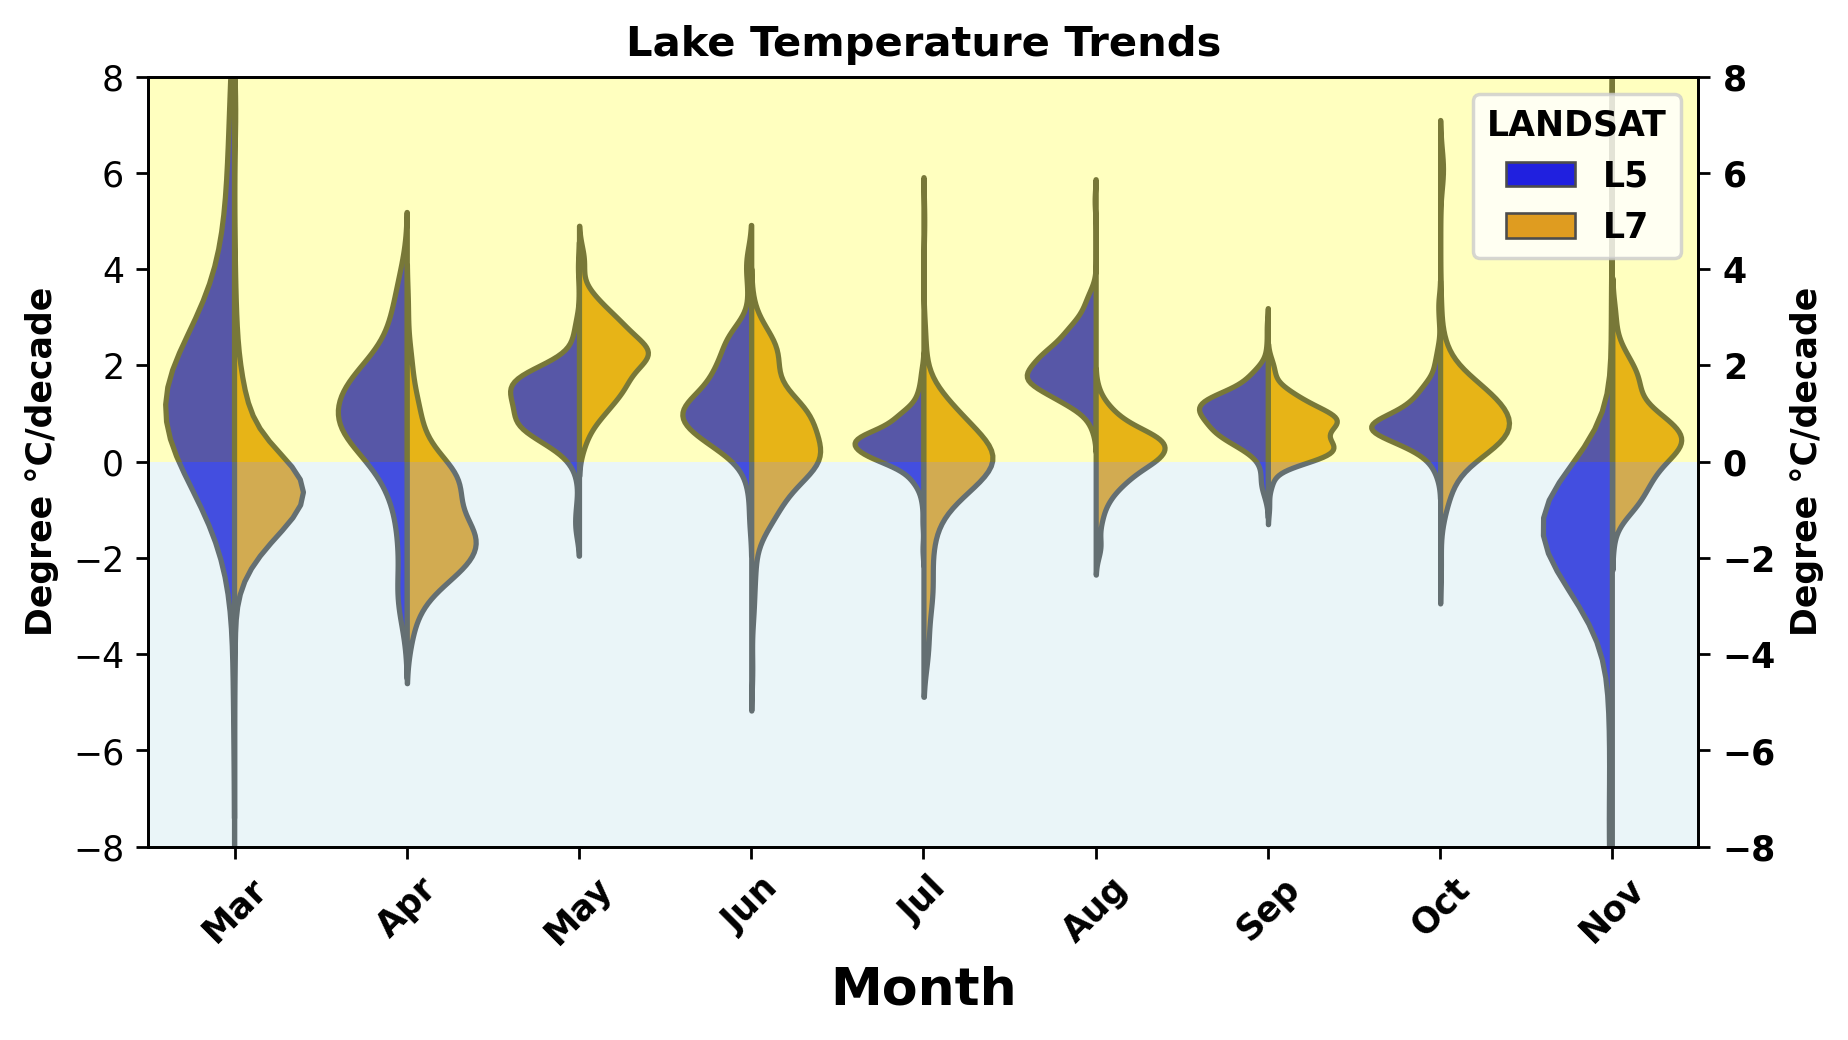

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_L5 = results_df_l5.sort_values('Month')
filtered_L7 = results_df_l7.sort_values('Month')

# Add a 'Lake_Type' column to differentiate between L5 and L7
filtered_L5['LANDSAT'] = 'L5'
filtered_L7['LANDSAT'] = 'L7'

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat([filtered_L5, filtered_L7])

filtered_combined = combined_df[(combined_df['Month'] >= 3) & (combined_df['Month'] <= 11)]

# Plotting with larger figure size
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=250)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Create a single violin plot with the first y-axis
sns.violinplot(data=filtered_combined, x="Month", y="Slope_per_Decade", hue="LANDSAT",  
                scale='width', palette={'L5': 'blue', 'L7': 'orange'}, split=True, inner=None)

# Customizing x-axis tick labels to start from March
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
plt.xticks(range(0, len(months)), months, rotation=45, weight='bold')

# Add legend with 'Lake Type' title
ax1.legend(title='LANDSAT')

# Calculate and set the y-axis limits for ax1 (Landsat 5) and ax2 (Landsat 7)
ax1_ylim = (filtered_combined['Slope_per_Decade'].min(), filtered_combined['Slope_per_Decade'].max())
ax2_ylim = (filtered_combined['Slope_per_Decade'].min(), filtered_combined['Slope_per_Decade'].max())

# Add a secondary y-axis (ax2) with the range for Landsat 7 data
ax2 = ax1.twinx()
ax2.set_ylabel('Degree °C/decade', weight='bold')
ax2.set_ylim(-8, 8)  # Set the limits based on Landsat 7 data range

# Set the y-axis limits for ax1 (Landsat 5)
ax1.set_ylim(-8, 8)

ax1.axhspan(0, 15, facecolor='yellow', alpha=0.25)
ax1.axhspan(-15, 0, facecolor='lightblue', alpha=0.25)

ax1.set_ylabel('Degree °C/decade', weight='bold')
ax1.set_xlabel('Month', fontsize=15, weight='bold')
ax1.set_title('Lake Temperature Trends', weight='bold')
ax1.grid(False)  # Remove grid lines

# Make y-tick labels bold
plt.yticks(fontweight='bold')

plt.show()


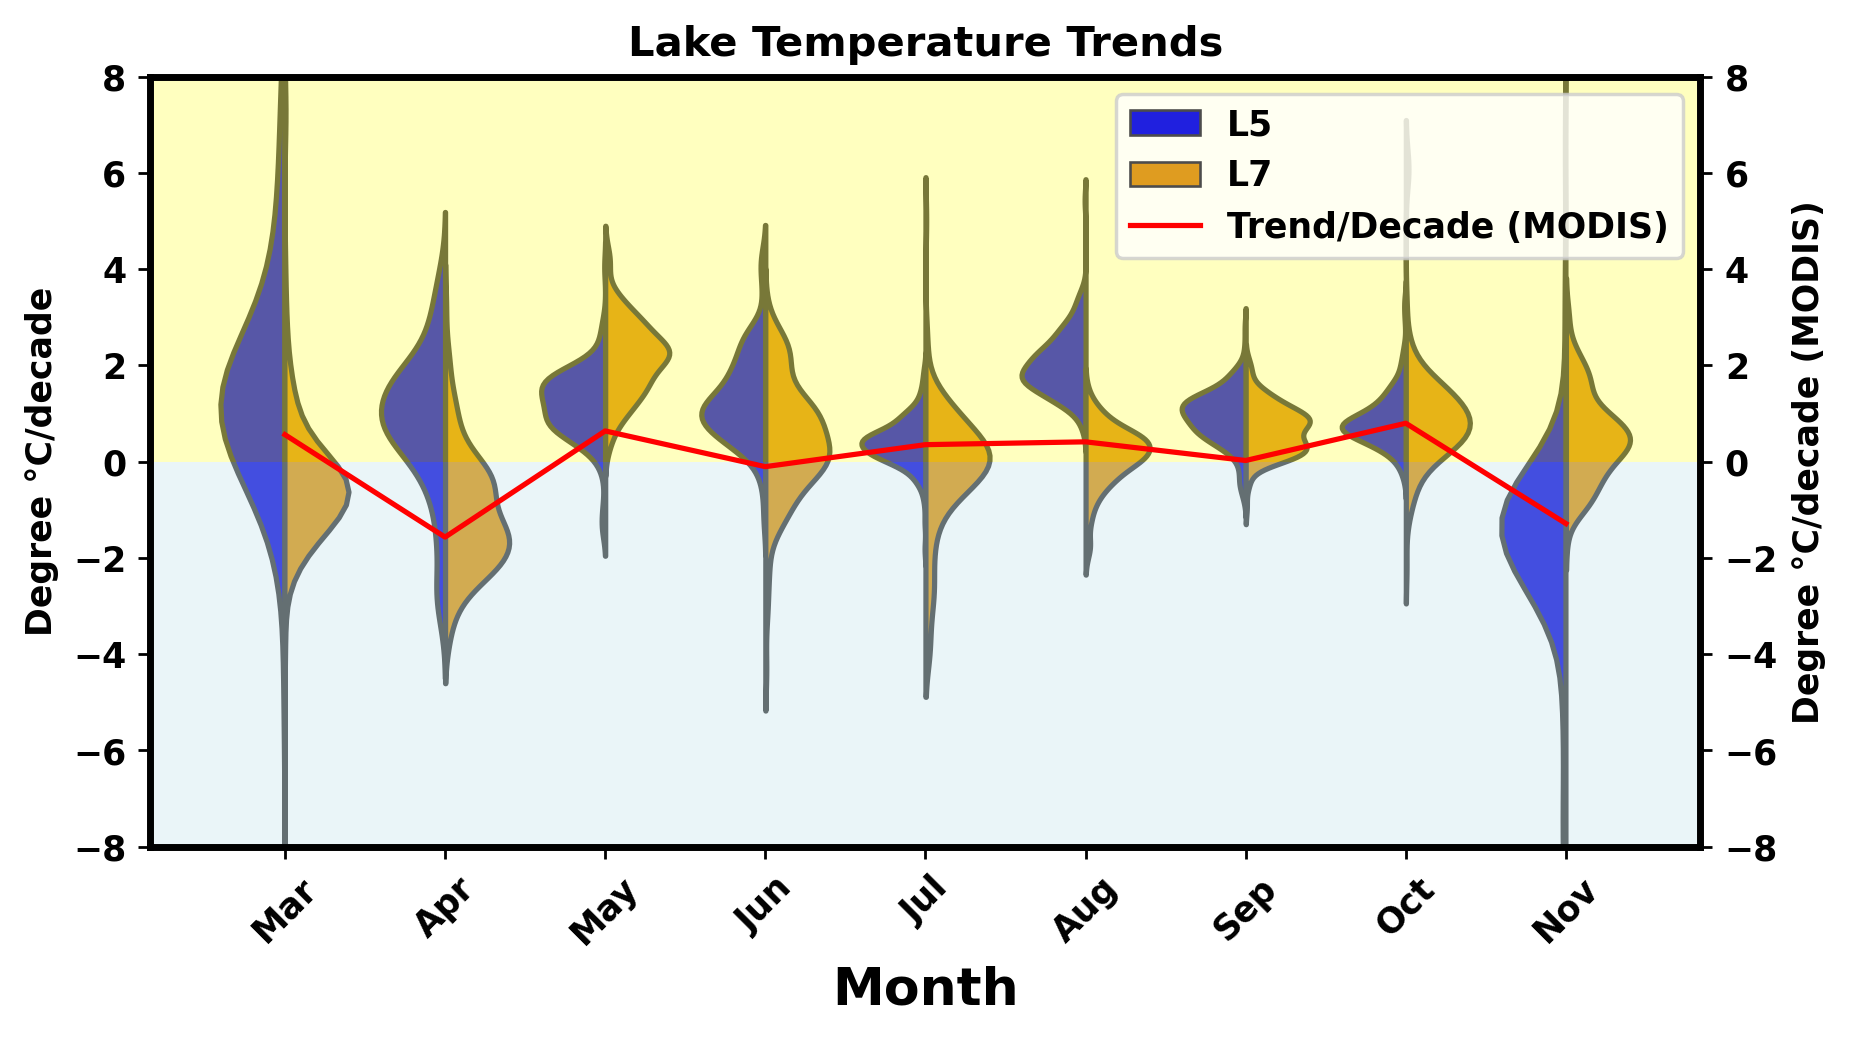

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming significant_slopes_MODIS DataFrame is already loaded

# Merge MODIS data with combined_df on 'Month' column
merged_data = pd.merge(filtered_combined, significant_slopes_MODIS[['Month', 'Trend/Decade']], on='Month', how='inner')

# Adjust the 'Month' column in merged_data for scatter plot
merged_data['Adjusted_Month'] = merged_data['Month'] - 3

# Plotting with larger figure size
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=250)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Create a single violin plot with the first y-axis
sns.violinplot(data=merged_data, x="Month", y="Slope_per_Decade", hue="LANDSAT",  
                scale='width', palette={'L5': 'blue', 'L7': 'orange'}, split=True, inner=None)

# Customizing x-axis tick labels to start from January
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
plt.xticks(range(0, len(months)), months, rotation=45, weight='bold')

# Add legend with 'Lake Type' title
ax1.legend(title='LANDSAT')

# Calculate and set the y-axis limits for ax1 (Landsat 5) and ax2 (Landsat 7)
ax1_ylim = (merged_data['Slope_per_Decade'].min(), merged_data['Slope_per_Decade'].max())
ax2_ylim = (merged_data['Slope_per_Decade'].min(), merged_data['Slope_per_Decade'].max())

# Add a secondary y-axis (ax2) with the range for Landsat 7 data
ax2 = ax1.twinx()
ax2.set_ylabel('Degree °C/decade (MODIS)', weight='bold')
ax2.set_ylim(-8,8)  # Set the limits based on merged data range

# Set the y-axis limits for ax1 (Landsat 5)
ax1.set_ylim(-8,8)

ax1.axhspan(0, 30, facecolor='yellow', alpha=0.25)
ax1.axhspan(-35, 0, facecolor='lightblue', alpha=0.25)

ax1.set_ylabel('Degree °C/decade', weight='bold')
ax1.set_xlabel('Month', fontsize=15, weight='bold')
ax1.set_title('Lake Temperature Trends', weight='bold')
ax1.grid(False)  # Remove grid lines

# Make y-tick labels bold
plt.yticks(fontweight='bold')

# Plot 'Monty_trends' data using a scatter plot over the violin plot
# ax1.scatter(merged_data['Adjusted_Month'], merged_data['Trend/Decade'],  color='red', label='Trend/Decade (MODIS)')

# Connect MODIS data points with lines
ax1.plot(merged_data['Adjusted_Month'], merged_data['Trend/Decade'], linestyle='-', color='red', label='Trend/Decade (MODIS)')

ax1.legend(loc='upper right')  # Add legend for Monty_trends (MODIS)

# Bolden the borders of the figure
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

plt.show()


## Preparing data for MODIS vs Landsat 7 Map (135 Lakes)

In [21]:
# Read the Excel file
cslap_aeap = pd.read_csv(r"C:\Users\aisha\Downloads\CSLAP_AEAP_TEMP_MODIFIED.csv")

# Filter for the first unique "PERMANENT_ID"
cslap_aeap = cslap_aeap.drop_duplicates(subset=['PERMANENT_ID'], keep='first')

cslap_aeap

,PERMANENT_ID,lake.name,DATA_PROVIDER,date,temp,Lat,Lon
0,115354015,AUGUR LAKE,CSL,8/1/2004 10:00,25.000000,44.457802,-73.501404
24,135271226,BARNUM POND,LCI,8/29/2018 10:50,22.650000,44.460870,-74.255390
26,92083101,BARTLETT POND,LCI,8/29/2018 10:45,24.035000,44.105600,-73.511780
31,89364475,BEAVER POND,LCI,8/10/2021 13:30,24.861750,43.748795,-73.717399
32,131843856,Big Moose,Aeap,6/30/1994 0:00,18.500000,43.828064,-74.854500
...,...,...,...,...,...,...,...
1755,47727911,VANDENBURG POND,LCI,7/29/2020 12:40,26.301000,43.117764,-74.364044
1756,131844064,West,Aeap,6/30/1994 0:00,19.400000,43.810821,-74.882531
1794,47723283,Willis,Aeap,6/28/1994 0:00,22.500000,43.368912,-74.241514
1822,133099321,Willys,Aeap,6/20/1994 0:00,22.700000,43.968516,-74.958341


In [22]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)
    
    #return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

cslap_aeap = cslap_aeap[(cslap_aeap['Lat'].notnull()) & (cslap_aeap['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in cslap_aeap.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['lake.name']
    Lon = row['Lon']
    Lat = row['Lat']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(1, 12, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l7.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l7_135 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l7_135.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l7_135

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
918,1999-07-12,23.570559,129691063,BLACK POND,-74.381049,44.308057
4613,1999-07-12,NaN,53540061,DEER LAKE,-74.761378,43.554911
19684,1999-07-12,NaN,89363853,ROCK LAKE,-74.329138,43.827114
4423,1999-07-12,NaN,131844150,Dart,-74.869366,43.792735
14546,1999-07-12,22.562546,132434585,LITTLE SIMON POND,-74.444400,44.154200
...,...,...,...,...,...,...
25350,2023-10-03,16.573215,131844064,West,-74.882531,43.810821
21435,2023-10-03,18.651033,131842163,SAND POND,-75.162041,43.949720
4710,2023-10-03,16.878172,53540061,DEER LAKE,-74.761378,43.554911
3000,2023-10-03,17.089768,131844130,Cascade,-74.809831,43.789124


In [23]:
# Remove duplicates from specified columns
# First, remove any leading or trailing whitespace characters from column names
df_all_lakes_l7_135.columns = df_all_lakes_l5.columns.str.strip()

# Now drop duplicates
df_all_lakes_l7_135.dropna(inplace=True)
df_all_lakes_l7_135 = df_all_lakes_l7_135.drop_duplicates(subset=['DATE_SMP', 'PERMANENT_ID', 'SITE_NAME', 'Lon', 'Lat'])

df_all_lakes_l7_135

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
918,1999-07-12,23.570559,129691063,BLACK POND,-74.381049,44.308057
14546,1999-07-12,22.562546,132434585,LITTLE SIMON POND,-74.444400,44.154200
9367,1999-07-12,22.345924,131845587,Grass,-75.061021,43.692551
11546,1999-07-12,22.748947,53541797,KLONDIKE RESERVOIR,-74.787972,43.231961
20062,1999-07-12,22.811884,129691090,ROLLINS POND,-74.414874,44.311988
...,...,...,...,...,...,...
25350,2023-10-03,16.573215,131844064,West,-74.882531,43.810821
21435,2023-10-03,18.651033,131842163,SAND POND,-75.162041,43.949720
4710,2023-10-03,16.878172,53540061,DEER LAKE,-74.761378,43.554911
3000,2023-10-03,17.089768,131844130,Cascade,-74.809831,43.789124


In [24]:
import pandas as pd
from scipy import stats
import numpy as np

# Create a list to store the results
results = []
df_all_lakes_l7_135['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7_135['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l7_135.groupby('PERMANENT_ID'):
    pond_n = df_all_lakes_l7_135.loc[df_all_lakes_l7_135['PERMANENT_ID'] == lake_id, 'SITE_NAME'].iloc[0]

    # Loop over each month
    for month in range(1, 13):
        month_data = lake_data[lake_data['DATE_SMP'].dt.month.isin([5,6, 7, 8,9,10,11])]

        # Remove NaN or blank values from x_values and corresponding y_values
        x_values = month_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
        y_values = month_data['temp_satellite'].values
        mask = ~np.isnan(x_values) & ~np.isnan(y_values)
        x_values = x_values[mask]
        y_values = y_values[mask]

        # Check if x and y contain more than one distinct value
        if len(np.unique(x_values)) > 1:
            slope, _, r_value, p_value, _ = stats.linregress(x_values, y_values)

            # Check if the trend is significant (p-value < 0.05)
            slope_per_decade = slope * 10 * 365 * 24 * 3600  # Convert to °C/decade
            result = {
                'Lake_ID': lake_id,
                'Lake_name': pond_n,
                'Month': month,
                'Slope_per_Decade': slope_per_decade,
                'P-value': p_value,
                'R-value': r_value,
                'Temp_satellite': y_values.mean()  # Calculate mean temperature for non-blank values
            }
            results.append(result)

# Create a DataFrame from the results
results_df_l7 = pd.DataFrame(results)

results_df_l7

# # Save the DataFrame to a CSV file
# results_df.to_csv('significant_slopes_L7_1000_Monthly_4222024_1.csv', index=False)

# print("Results saved to significant_slopes_L7_1000_Monthly_4122024_1.csv")


,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,115353567,FERN LAKE,1,0.794793,0.467807,0.096365,17.867120
1,115353567,FERN LAKE,2,0.794793,0.467807,0.096365,17.867120
2,115353567,FERN LAKE,3,0.794793,0.467807,0.096365,17.867120
3,115353567,FERN LAKE,4,0.794793,0.467807,0.096365,17.867120
4,115353567,FERN LAKE,5,0.794793,0.467807,0.096365,17.867120
...,...,...,...,...,...,...,...
1579,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,8,0.565195,0.445796,0.074480,17.487992
1580,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,9,0.565195,0.445796,0.074480,17.487992
1581,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,10,0.565195,0.445796,0.074480,17.487992
1582,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,11,0.565195,0.445796,0.074480,17.487992


In [25]:
import pandas as pd
from scipy import stats
import numpy as np

# Create a list to store the results
results = []
df_all_lakes_l7_135['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7_135['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l7_135.groupby('PERMANENT_ID'):
    pond_n = df_all_lakes_l7_135.loc[df_all_lakes_l7_135['PERMANENT_ID'] == lake_id, 'SITE_NAME'].iloc[0]

    # Combine data for June, July, and August
    summer_data = lake_data[lake_data['DATE_SMP'].dt.month.isin([5,6, 7, 8,9,10,11])]
    
    # Filter out rows with NaN values
    summer_data = summer_data.dropna(subset=['temp_satellite'])
    
    # Check if the data is not empty
    if not summer_data.empty:
        # Compute the linear regression
        x_values = summer_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
        y_values = summer_data['temp_satellite'].values
        
        # Check if x and y contain more than one value
        if len(x_values) > 1:
            slope, _, r_value, p_value, _ = stats.linregress(x_values, y_values)
            
            # Check if the trend is significant (p-value < 0.05)
            # if p_value < 0.05:
            slope_per_decade = slope * 10 * 365 * 24 * 3600  # Convert to °C/decade
            result = {
                'Lake_ID': lake_id,
                'Lake_name': pond_n,
                'Month': "May-November",
                'Slope_per_Decade': slope_per_decade,
                'P-value': p_value,
                'R-value': r_value,
                'Temp_satellite': y_values.mean()  # Calculate mean temperature
            }
            results.append(result)

# Create a DataFrame from the results
results_df_135 = pd.DataFrame(results)

results_df_135

# # Save the DataFrame to a CSV file
# results_df.to_csv('significant_slopes_L5_199_May_November_4232024_WaterMask.csv', index=False)

# print("Results saved to significant_slopes_L5_1000_May_November_4122024_1.csv")

,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,115353567,FERN LAKE,May-November,0.794793,0.467807,0.096365,17.867120
1,115353625,BUTTERNUT POND,May-November,-0.060525,0.957793,-0.006919,18.729250
2,115353775,LAKE PLACID,May-November,0.872304,0.272788,0.113050,16.365080
3,115353807,MIRROR LAKE,May-November,0.377266,0.619561,0.048080,17.417802
4,115353879,LOWER CASCADE LAKE,May-November,0.315726,0.787725,0.033261,17.519887
...,...,...,...,...,...,...,...
127,92083103,MILL POND,May-November,0.040592,0.972439,0.004517,18.097838
128,92083457,JABE POND,May-November,0.345132,0.771947,0.037879,17.549558
129,92083545,PINE LAKE,May-November,0.373603,0.650492,0.046097,18.718124
130,92083789,LAKE GEORGE,May-November,1.382157,0.210556,0.166878,17.447937


In [26]:
# Merge the DataFrames and select only the "Lat" and "Lon" columns from cslap_aeap
merged_df = pd.merge(results_df_l7, cslap_aeap[['PERMANENT_ID', 'Lat', 'Lon']], how='left', left_on='Lake_ID', right_on='PERMANENT_ID')

merged_df.drop_duplicates(inplace=True)

# Drop the duplicate "PERMANENT_ID" column
merged_df.drop(columns=['PERMANENT_ID', "Month"], inplace=True)

# Drop duplicates from the merged DataFrame
merged_df.drop_duplicates(subset=['Lake_ID'], keep='first', inplace=True)

# Print the merged DataFrame
merged_df

,Lake_ID,Lake_name,Slope_per_Decade,P-value,R-value,Temp_satellite,Lat,Lon
0,115353567,FERN LAKE,0.794793,0.467807,0.096365,17.867120,44.487640,-73.721980
12,115353625,BUTTERNUT POND,-0.060525,0.957793,-0.006919,18.729250,44.427832,-73.498382
24,115353775,LAKE PLACID,0.872304,0.272788,0.113050,16.365080,44.325199,-73.959198
36,115353807,MIRROR LAKE,0.377266,0.619561,0.048080,17.417802,44.289001,-73.982101
48,115353879,LOWER CASCADE LAKE,0.315726,0.787725,0.033261,17.519887,44.227000,-73.873000
...,...,...,...,...,...,...,...,...
1524,92083103,MILL POND,0.040592,0.972439,0.004517,18.097838,44.113117,-73.549198
1536,92083457,JABE POND,0.345132,0.771947,0.037879,17.549558,43.709010,-73.534611
1548,92083545,PINE LAKE,0.373603,0.650492,0.046097,18.718124,43.606448,-73.458098
1560,92083789,LAKE GEORGE,1.382157,0.210556,0.166878,17.447937,43.522617,-73.667461


In [27]:
# Save the DataFrame to a CSV file
merged_df.to_csv('updated_slopes_L7_135_May_November_5102024_WaterMask.csv', index=False)

print("Results saved to slopes_L7_135_May_November_4122024_1.csv")

Results saved to slopes_L7_135_May_November_4122024_1.csv


## 135 Lakes L5 vs L7 vs MODIS Violin Plot

In [28]:
# Read the Excel file
cslap_aeap = pd.read_csv(r"C:\Users\aisha\Downloads\CSLAP_AEAP_TEMP_MODIFIED.csv")

# Filter for the first unique "PERMANENT_ID"
cslap_aeap = cslap_aeap.drop_duplicates(subset=['PERMANENT_ID'], keep='first')

cslap_aeap

,PERMANENT_ID,lake.name,DATA_PROVIDER,date,temp,Lat,Lon
0,115354015,AUGUR LAKE,CSL,8/1/2004 10:00,25.000000,44.457802,-73.501404
24,135271226,BARNUM POND,LCI,8/29/2018 10:50,22.650000,44.460870,-74.255390
26,92083101,BARTLETT POND,LCI,8/29/2018 10:45,24.035000,44.105600,-73.511780
31,89364475,BEAVER POND,LCI,8/10/2021 13:30,24.861750,43.748795,-73.717399
32,131843856,Big Moose,Aeap,6/30/1994 0:00,18.500000,43.828064,-74.854500
...,...,...,...,...,...,...,...
1755,47727911,VANDENBURG POND,LCI,7/29/2020 12:40,26.301000,43.117764,-74.364044
1756,131844064,West,Aeap,6/30/1994 0:00,19.400000,43.810821,-74.882531
1794,47723283,Willis,Aeap,6/28/1994 0:00,22.500000,43.368912,-74.241514
1822,133099321,Willys,Aeap,6/20/1994 0:00,22.700000,43.968516,-74.958341


In [29]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)
    
    #return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

cslap_aeap = cslap_aeap[(cslap_aeap['Lat'].notnull()) & (cslap_aeap['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in cslap_aeap.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['lake.name']
    Lon = row['Lon']
    Lat = row['Lat']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(1, 12, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l7.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l7 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l7.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l7

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
918,1999-07-12,23.570559,129691063,BLACK POND,-74.381049,44.308057
4613,1999-07-12,NaN,53540061,DEER LAKE,-74.761378,43.554911
19684,1999-07-12,NaN,89363853,ROCK LAKE,-74.329138,43.827114
4423,1999-07-12,NaN,131844150,Dart,-74.869366,43.792735
14546,1999-07-12,22.562546,132434585,LITTLE SIMON POND,-74.444400,44.154200
...,...,...,...,...,...,...
25350,2023-10-03,16.573215,131844064,West,-74.882531,43.810821
21435,2023-10-03,18.651033,131842163,SAND POND,-75.162041,43.949720
4710,2023-10-03,16.878172,53540061,DEER LAKE,-74.761378,43.554911
3000,2023-10-03,17.089768,131844130,Cascade,-74.809831,43.789124


In [30]:
# Remove duplicates from specified columns
# First, remove any leading or trailing whitespace characters from column names
df_all_lakes_l7.columns = df_all_lakes_l7.columns.str.strip()

# Now drop duplicates
df_all_lakes_l7.dropna(inplace=True)
df_all_lakes_l7 = df_all_lakes_l7.drop_duplicates(subset=['DATE_SMP', 'PERMANENT_ID', 'SITE_NAME', 'Lon', 'Lat'])

df_all_lakes_l7

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
918,1999-07-12,23.570559,129691063,BLACK POND,-74.381049,44.308057
14546,1999-07-12,22.562546,132434585,LITTLE SIMON POND,-74.444400,44.154200
9367,1999-07-12,22.345924,131845587,Grass,-75.061021,43.692551
11546,1999-07-12,22.748947,53541797,KLONDIKE RESERVOIR,-74.787972,43.231961
20062,1999-07-12,22.811884,129691090,ROLLINS POND,-74.414874,44.311988
...,...,...,...,...,...,...
25350,2023-10-03,16.573215,131844064,West,-74.882531,43.810821
21435,2023-10-03,18.651033,131842163,SAND POND,-75.162041,43.949720
4710,2023-10-03,16.878172,53540061,DEER LAKE,-74.761378,43.554911
3000,2023-10-03,17.089768,131844130,Cascade,-74.809831,43.789124


In [31]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)

    #return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)


# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

cslap_aeap = cslap_aeap[(cslap_aeap['Lat'].notnull()) & (cslap_aeap['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in cslap_aeap.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['lake.name']
    Lon = row['Lon']
    Lat = row['Lat']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(1, 12, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l5 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l5.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
4538,1984-03-24,NaN,131843304,Constable,-74.796543,43.833312
12188,1984-03-24,NaN,131845836,Indian,-74.753776,43.615933
20520,1984-03-24,NaN,131846580,North,-74.940170,43.526838
21342,1984-03-24,NaN,47727981,PECK LAKE,-74.413300,43.110599
13444,1984-03-24,-18.505020,47722801,LAKE ALGONQUIN,-74.292937,43.390575
...,...,...,...,...,...,...
28477,2011-10-09,15.421409,132437375,UTOWANA LAKE,-74.520104,43.833800
18694,2011-10-09,15.240871,150563206,LOWER SARANAC LAKE,-74.178966,44.314595
26932,2011-10-09,14.666123,133098699,SUCKER LAKE,-75.119698,44.179600
29684,2011-10-09,15.120334,131846298,WOODHULL LAKE,-75.015300,43.598680


In [32]:
# Remove duplicates from specified columns
# First, remove any leading or trailing whitespace characters from column names
df_all_lakes_l5.columns = df_all_lakes_l5.columns.str.strip()

# Now drop duplicates
df_all_lakes_l5.dropna(inplace=True)
df_all_lakes_l5 = df_all_lakes_l5.drop_duplicates(subset=['DATE_SMP', 'PERMANENT_ID', 'SITE_NAME', 'Lon', 'Lat'])

df_all_lakes_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
13444,1984-03-24,-18.505020,47722801,LAKE ALGONQUIN,-74.292937,43.390575
12092,1984-03-24,-13.052732,47725865,HUNT LAKE,-73.904999,43.259800
7312,1984-03-24,-15.168092,47725737,EFNER LAKE,-73.928596,43.266300
5280,1984-03-24,-17.698275,53540061,DEER LAKE,-74.761378,43.554911
12989,1984-03-24,-6.672447,89365115,KINGS FLOW,-74.232270,43.683560
...,...,...,...,...,...,...
18448,2011-10-09,19.206999,115353879,LOWER CASCADE LAKE,-73.873000,44.227000
18694,2011-10-09,15.240871,150563206,LOWER SARANAC LAKE,-74.178966,44.314595
26932,2011-10-09,14.666123,133098699,SUCKER LAKE,-75.119698,44.179600
29684,2011-10-09,15.120334,131846298,WOODHULL LAKE,-75.015300,43.598680


In [33]:
import pandas as pd
from scipy import stats
import numpy as np

# Create a list to store the results
results = []
df_all_lakes_l7['DATE_SMP'] = pd.to_datetime(df_all_lakes_l7['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l7.groupby('PERMANENT_ID'):
    pond_n = df_all_lakes_l7.loc[df_all_lakes_l7['PERMANENT_ID'] == lake_id, 'SITE_NAME'].iloc[0]

    # Loop over each month
    for month in range(1, 13):
        month_data = lake_data[lake_data['DATE_SMP'].dt.month == month]

        # Remove NaN or blank values from x_values and corresponding y_values
        x_values = month_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
        y_values = month_data['temp_satellite'].values
        mask = ~np.isnan(x_values) & ~np.isnan(y_values)
        x_values = x_values[mask]
        y_values = y_values[mask]

        # Check if x and y contain more than one distinct value
        if len(np.unique(x_values)) > 1:
            slope, _, r_value, p_value, _ = stats.linregress(x_values, y_values)

            # Check if the trend is significant (p-value < 0.05)
            slope_per_decade = slope * 10 * 365 * 24 * 3600  # Convert to °C/decade
            result = {
                'Lake_ID': lake_id,
                'Lake_name': pond_n,
                'Month': month,
                'Slope_per_Decade': slope_per_decade,
                'P-value': p_value,
                'R-value': r_value,
                'Temp_satellite': y_values.mean()  # Calculate mean temperature for non-blank values
            }
            results.append(result)

# Create a DataFrame from the results
results_df_l7 = pd.DataFrame(results)

results_df_l7

# # Save the DataFrame to a CSV file
# results_df.to_csv('significant_slopes_L7_1000_Monthly_4222024_1.csv', index=False)

# print("Results saved to significant_slopes_L7_1000_Monthly_4122024_1.csv")


,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,115353567,FERN LAKE,1,-1.115383,0.718412,-0.190012,-18.438764
1,115353567,FERN LAKE,3,-0.251330,0.969192,-0.048374,0.171110
2,115353567,FERN LAKE,4,-3.714701,0.239328,-0.409972,6.662171
3,115353567,FERN LAKE,5,1.950787,0.183969,0.349925,15.670839
4,115353567,FERN LAKE,6,0.917034,0.266339,0.542256,20.149018
...,...,...,...,...,...,...,...
1546,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,8,0.054873,0.937655,0.021279,22.824510
1547,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,9,0.372146,0.544514,0.130118,19.630839
1548,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,10,1.327933,0.092870,0.434195,14.228028
1549,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,11,-0.174326,0.854557,-0.071700,6.291977


In [34]:
import pandas as pd
from scipy import stats
import numpy as np

# Create a list to store the results
results = []
df_all_lakes_l5['DATE_SMP'] = pd.to_datetime(df_all_lakes_l5['DATE_SMP'])

# Loop over each lake in the DataFrame
for lake_id, lake_data in df_all_lakes_l5.groupby('PERMANENT_ID'):
    pond_n = df_all_lakes_l5.loc[df_all_lakes_l5['PERMANENT_ID'] == lake_id, 'SITE_NAME'].iloc[0]

    # Loop over each month
    for month in range(1, 13):
        month_data = lake_data[lake_data['DATE_SMP'].dt.month == month]

        # Remove NaN or blank values from x_values and corresponding y_values
        x_values = month_data['DATE_SMP'].values.astype(np.int64) // (10 ** 9)  # Convert to seconds
        y_values = month_data['temp_satellite'].values
        mask = ~np.isnan(x_values) & ~np.isnan(y_values)
        x_values = x_values[mask]
        y_values = y_values[mask]

        # Check if x and y contain more than one distinct value
        if len(np.unique(x_values)) > 1:
            slope, _, r_value, p_value, _ = stats.linregress(x_values, y_values)

            # Check if the trend is significant (p-value < 0.05)
            slope_per_decade = slope * 10 * 365 * 24 * 3600  # Convert to °C/decade
            result = {
                'Lake_ID': lake_id,
                'Lake_name': pond_n,
                'Month': month,
                'Slope_per_Decade': slope_per_decade,
                'P-value': p_value,
                'R-value': r_value,
                'Temp_satellite': y_values.mean()  # Calculate mean temperature for non-blank values
            }
            results.append(result)

# Create a DataFrame from the results
results_df_l5 = pd.DataFrame(results)

results_df_l5

# # Save the DataFrame to a CSV file
# results_df.to_csv('significant_slopes_L7_1000_Monthly_4222024_1.csv', index=False)

# print("Results saved to significant_slopes_L7_1000_Monthly_4122024_1.csv")


,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,115353567,FERN LAKE,1,8.506672,0.101149,0.803863,-11.518609
1,115353567,FERN LAKE,2,0.769364,0.694464,0.126836,-14.223913
2,115353567,FERN LAKE,3,-1.341040,0.548829,-0.451171,0.219415
3,115353567,FERN LAKE,4,-0.276657,0.893086,-0.084069,5.670950
4,115353567,FERN LAKE,5,-1.444732,0.267325,-0.541325,15.657001
...,...,...,...,...,...,...,...
1573,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,8,1.542779,0.027300,0.587070,21.877369
1574,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,9,1.018540,0.378773,0.214101,17.550256
1575,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,10,1.001566,0.303900,0.265045,10.785909
1576,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,11,2.084239,0.652350,0.519348,3.284831


In [35]:
import pandas as pd
coord_file_path = r"C:\Users\aisha\Downloads\MODIS Trends_Monthly_day_night.xlsx"
significant_slopes_MODIS = pd.read_excel(coord_file_path)
significant_slopes_MODIS.dropna(inplace=True)
significant_slopes_MODIS

,Month,Monty_trends,Trend/Decade,Monthly_Intercept
0,1,0.004577,1.418757,264.275723
1,2,0.001396,0.404961,266.768075
2,3,0.001801,0.558449,273.112644
3,4,-0.005234,-1.570279,286.334980
4,5,0.002052,0.636186,291.908196
5,6,-0.000354,-0.106081,294.697613
6,7,0.001132,0.351013,296.257169
7,8,0.001322,0.409683,295.130289
8,9,0.000073,0.021900,292.437071
9,10,0.002568,0.796163,284.361093


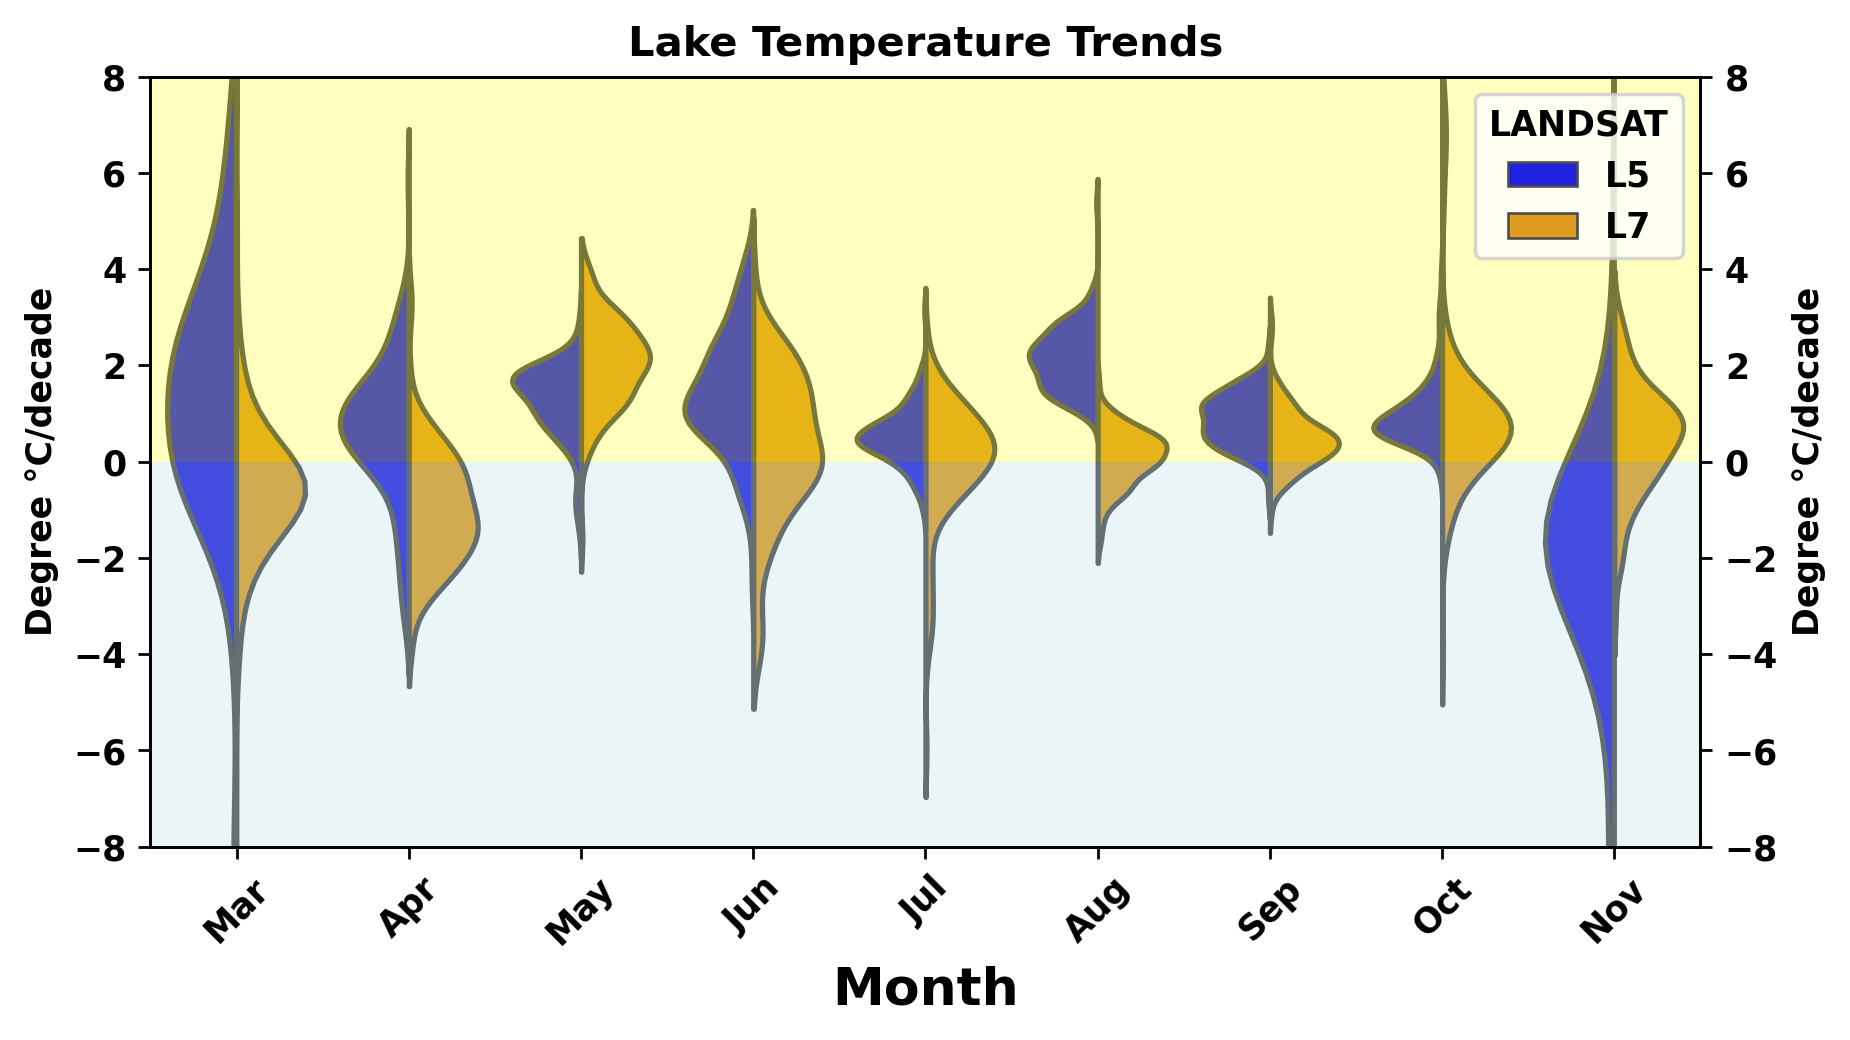

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_L5 = results_df_l5.sort_values('Month')
filtered_L7 = results_df_l7.sort_values('Month')

# Add a 'Lake_Type' column to differentiate between L5 and L7
filtered_L5['LANDSAT'] = 'L5'
filtered_L7['LANDSAT'] = 'L7'

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat([filtered_L5, filtered_L7])

filtered_combined = combined_df[(combined_df['Month'] >= 3) & (combined_df['Month'] <= 11)]

# Plotting with larger figure size
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=250)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Create a single violin plot with the first y-axis
sns.violinplot(data=filtered_combined, x="Month", y="Slope_per_Decade", hue="LANDSAT",  
                scale='width', palette={'L5': 'blue', 'L7': 'orange'}, split=True, inner=None)

# Customizing x-axis tick labels to start from March
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
plt.xticks(range(0, len(months)), months, rotation=45, weight='bold')

# Add legend with 'Lake Type' title
ax1.legend(title='LANDSAT')

# Calculate and set the y-axis limits for ax1 (Landsat 5) and ax2 (Landsat 7)
ax1_ylim = (filtered_combined['Slope_per_Decade'].min(), filtered_combined['Slope_per_Decade'].max())
ax2_ylim = (filtered_combined['Slope_per_Decade'].min(), filtered_combined['Slope_per_Decade'].max())

# Add a secondary y-axis (ax2) with the range for Landsat 7 data
ax2 = ax1.twinx()
ax2.set_ylabel('Degree °C/decade', weight='bold')
ax2.set_ylim(-8, 8)  # Set the limits based on Landsat 7 data range

# Set the y-axis limits for ax1 (Landsat 5)
ax1.set_ylim(-8, 8)

ax1.axhspan(0, 15, facecolor='yellow', alpha=0.25)
ax1.axhspan(-15, 0, facecolor='lightblue', alpha=0.25)

ax1.set_ylabel('Degree °C/decade', weight='bold')
ax1.set_xlabel('Month', fontsize=15, weight='bold')
ax1.set_title('Lake Temperature Trends', weight='bold')
ax1.grid(False)  # Remove grid lines

# Make y-tick labels bold
plt.yticks(fontweight='bold')

plt.show()


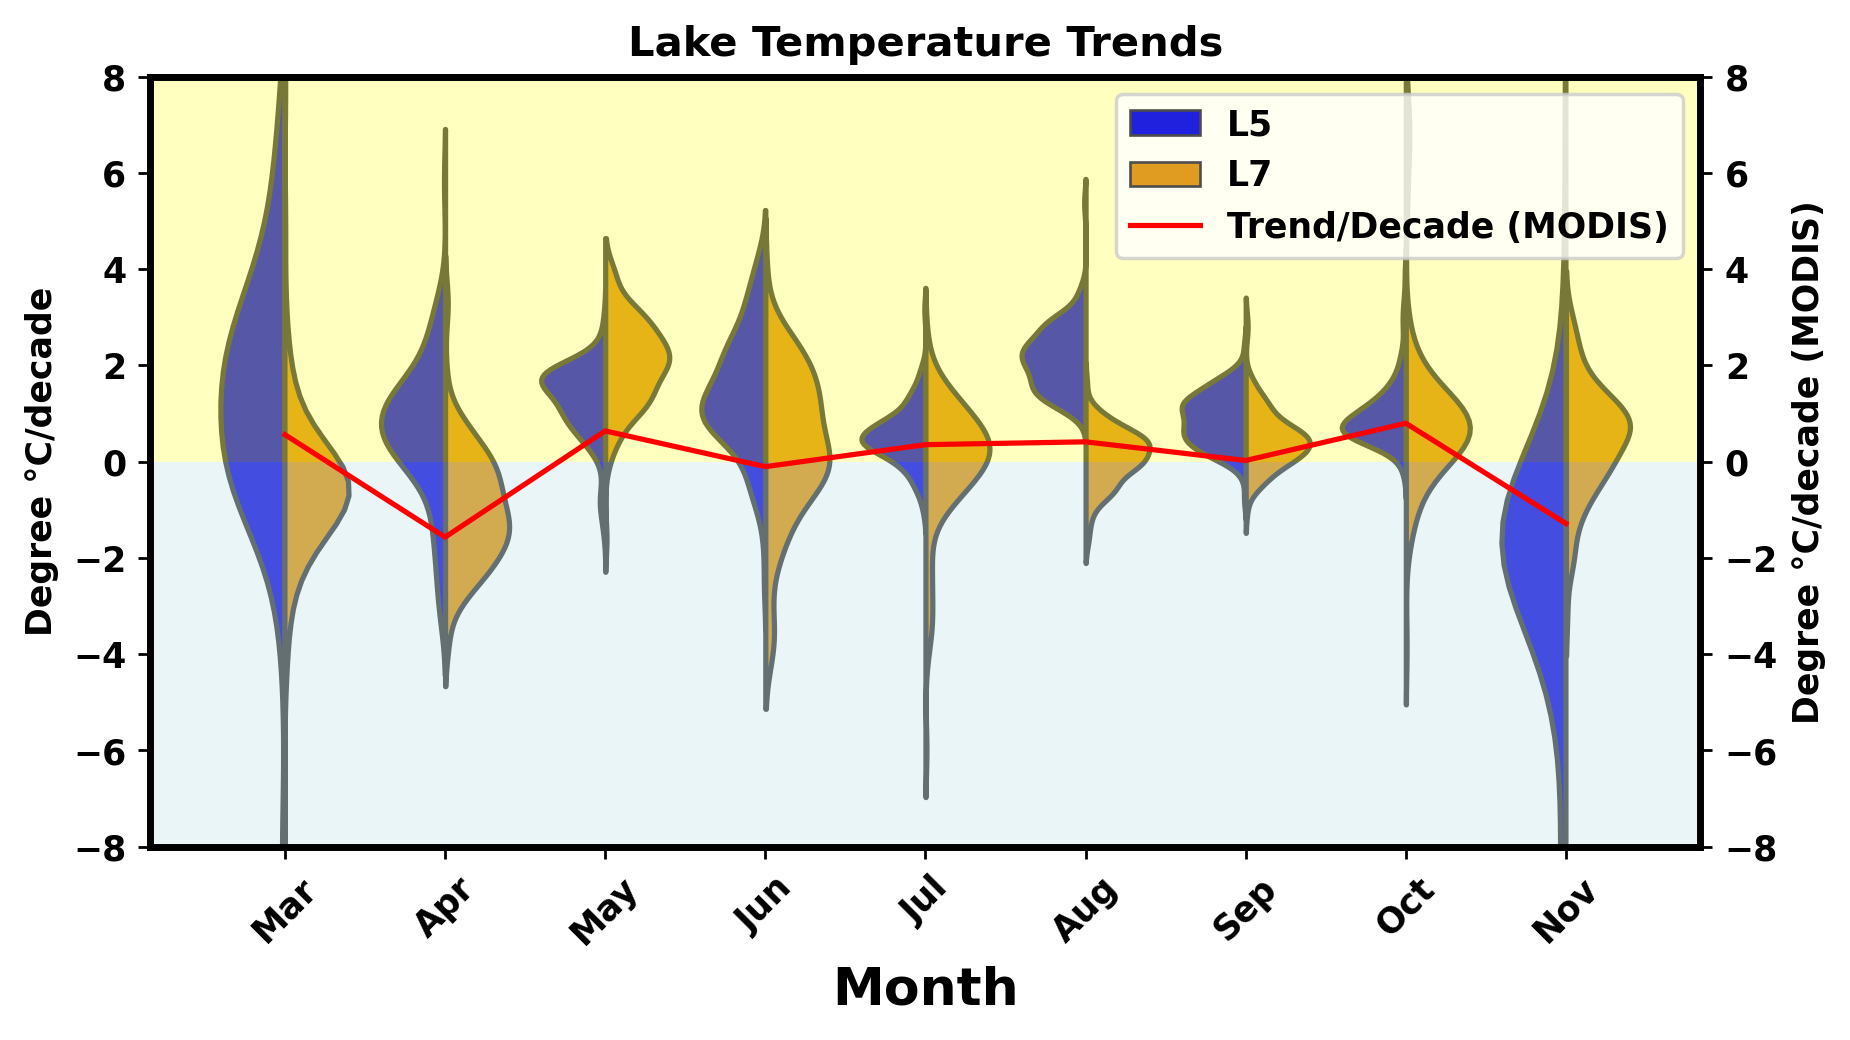

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming significant_slopes_MODIS DataFrame is already loaded

# Merge MODIS data with combined_df on 'Month' column
merged_data = pd.merge(filtered_combined, significant_slopes_MODIS[['Month', 'Trend/Decade']], on='Month', how='inner')

# Adjust the 'Month' column in merged_data for scatter plot
merged_data['Adjusted_Month'] = merged_data['Month'] - 3

# Plotting with larger figure size
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=250)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Create a single violin plot with the first y-axis
sns.violinplot(data=merged_data, x="Month", y="Slope_per_Decade", hue="LANDSAT",  
                scale='width', palette={'L5': 'blue', 'L7': 'orange'}, split=True, inner=None)

# Customizing x-axis tick labels to start from January
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
plt.xticks(range(0, len(months)), months, rotation=45, weight='bold')

# Add legend with 'Lake Type' title
ax1.legend(title='LANDSAT')

# Calculate and set the y-axis limits for ax1 (Landsat 5) and ax2 (Landsat 7)
ax1_ylim = (merged_data['Slope_per_Decade'].min(), merged_data['Slope_per_Decade'].max())
ax2_ylim = (merged_data['Slope_per_Decade'].min(), merged_data['Slope_per_Decade'].max())

# Add a secondary y-axis (ax2) with the range for Landsat 7 data
ax2 = ax1.twinx()
ax2.set_ylabel('Degree °C/decade (MODIS)', weight='bold')
ax2.set_ylim(-8,8)  # Set the limits based on merged data range

# Set the y-axis limits for ax1 (Landsat 5)
ax1.set_ylim(-8,8)

ax1.axhspan(0, 30, facecolor='yellow', alpha=0.25)
ax1.axhspan(-35, 0, facecolor='lightblue', alpha=0.25)

ax1.set_ylabel('Degree °C/decade', weight='bold')
ax1.set_xlabel('Month', fontsize=15, weight='bold')
ax1.set_title('Lake Temperature Trends', weight='bold')
ax1.grid(False)  # Remove grid lines

# Make y-tick labels bold
plt.yticks(fontweight='bold')

# Plot 'Monty_trends' data using a scatter plot over the violin plot
# ax1.scatter(merged_data['Adjusted_Month'], merged_data['Trend/Decade'],  color='red', label='Trend/Decade (MODIS)')

# Connect MODIS data points with lines
ax1.plot(merged_data['Adjusted_Month'], merged_data['Trend/Decade'], linestyle='-', color='red', label='Trend/Decade (MODIS)')

ax1.legend(loc='upper right')  # Add legend for Monty_trends (MODIS)

# Bolden the borders of the figure
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

plt.show()


## Data Generation of Bivariate Figure

In [70]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)
    
    #return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

cslap_aeap = cslap_aeap[(cslap_aeap['Lat'].notnull()) & (cslap_aeap['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in cslap_aeap.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['lake.name']
    Lon = row['Lon']
    Lat = row['Lat']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l7 = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(1, 12, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 50)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l7.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l7 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l7.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l7

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
54208,1999-07-05,NaN,131844064,West,-74.882531,43.810821
4095,1999-07-05,NaN,131845828,Brooktrout,-74.660857,43.602637
27444,1999-07-05,NaN,132436556,LAKE EATON,-74.466000,43.978000
46477,1999-07-05,NaN,132437546,SHALLOW LAKE,-74.730520,43.819442
17486,1999-07-05,NaN,89365393,FRIENDS LAKE,-73.844002,43.625900
...,...,...,...,...,...,...
17485,2023-10-15,14.956514,89365393,FRIENDS LAKE,-73.844002,43.625900
12270,2023-10-15,14.188581,89363405,EAGLE LAKE,-73.583099,43.880798
42870,2023-10-15,12.558342,89363595,ROCK POND,-73.596182,43.852639
33752,2023-10-15,13.375580,89365151,LOON LAKE,-73.847869,43.667069


In [71]:
# Remove duplicates from specified columns
# First, remove any leading or trailing whitespace characters from column names
df_all_lakes_l7.columns = df_all_lakes_l7.columns.str.strip()

# Now drop duplicates
df_all_lakes_l7.dropna(inplace=True)
df_all_lakes_l7 = df_all_lakes_l7.drop_duplicates(subset=['DATE_SMP', 'PERMANENT_ID', 'SITE_NAME', 'Lon', 'Lat'])

df_all_lakes_l7

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
20792,1999-07-05,23.079410,52532909,HADLOCK POND,-73.571999,43.423698
3214,1999-07-05,12.934106,89364961,BRANT LAKE,-73.702599,43.716099
25294,1999-07-05,18.466371,47722801,LAKE ALGONQUIN,-74.292937,43.390575
17692,1999-07-05,18.376340,{A12820E6-46CA-4331-BE8F-4C04BD153C6A},FULTON SECOND LAKE,-74.911598,43.721199
909,1999-07-05,18.629522,89364475,BEAVER POND,-73.717399,43.748795
...,...,...,...,...,...,...
906,2023-10-15,11.285349,89364475,BEAVER POND,-73.717399,43.748795
17485,2023-10-15,14.956514,89365393,FRIENDS LAKE,-73.844002,43.625900
12270,2023-10-15,14.188581,89363405,EAGLE LAKE,-73.583099,43.880798
42870,2023-10-15,12.558342,89363595,ROCK POND,-73.596182,43.852639


In [72]:
# # Save the DataFrame to a CSV file
# df_all_lakes_l7.to_csv('Landsat7_135_LAKES_CSLAP_AEAP_TEMP_50%_100m.csv', index=False)

In [73]:
ee.Initialize()

# Define the Landsat 5 bands and their corresponding standard names
LC7_BANDS = ['ST_B6']
STD_NAMES = ['temp_satellite']

# all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask)

def maskL457sr_SUMMER(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    waterMask = image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    #39000 is equivalent to 10 degree celcius
    temp_Summer = image.select('ST_B6').gt(40000)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask)

    #return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).updateMask(temp_Summer)


# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# cslap_aeap['date'] = pd.to_datetime(cslap_aeap['date'])

cslap_aeap = cslap_aeap[(cslap_aeap['Lat'].notnull()) & (cslap_aeap['Lon'].notnull())]

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for index, row in cslap_aeap.iterrows():
    # Extract lake information
    pondId = row['PERMANENT_ID']
    pondname = row['lake.name']
    Lon = row['Lon']
    Lat = row['Lat']
    
  
    # if isinstance(date, str):
    #     date = pd.to_datetime(date)
 
    # # Create a 2-day window around the current date
    # date_window_start = date - pd.Timedelta(days=3)
    # date_window_end = date + pd.Timedelta(days=3)

    lake_point = ee.Geometry.Point(row['Lon'], row['Lat'])

    #Create a 100-meter buffered box around the lake point
    lake_polygon = lake_point.buffer(100)
 
    # Retrieve Landsat 7 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(1, 12, 'month')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 50)) \
        .map(maskL457sr_SUMMER) \
        .select(LC7_BANDS, STD_NAMES)


      # .filter(ee.Filter.calendarRange(5, 12, 'month')) \
      #   .filter(ee.Filter.calendarRange(1984, 2011, 'year')) \
    
    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
    
    df_reflectance['PERMANENT_ID'] = pondId
    df_reflectance['SITE_NAME'] = pondname
    df_reflectance['Lon'] = Lon
    df_reflectance['Lat'] = Lat


    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes_l5 = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes_l5.sort_values(by='DATE_SMP', inplace=True)

# df_all_lakes.dropna(inplace=True)
df_all_lakes_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
19871,1984-03-24,NaN,47726126,GOOD LUCK LAKE,-74.539722,43.249400
19660,1984-03-24,-13.377400,89365829,GARNET LAKE,-74.016716,43.533369
37006,1984-03-24,NaN,131845583,Middle Branch,-75.100226,43.699561
47290,1984-03-24,NaN,132437679,Sagamore,-74.622173,43.768003
57163,1984-03-24,-18.370708,131844064,West,-74.882531,43.810821
...,...,...,...,...,...,...
53538,2011-10-09,15.655834,89363513,THIRD LAKE ESSEX CHAIN,-74.249000,43.877710
51674,2011-10-09,15.339204,131845641,Squaw,-74.739770,43.633338
58429,2011-10-09,15.120334,131846298,WOODHULL LAKE,-75.015300,43.598680
42592,2011-10-11,16.132797,92083545,PINE LAKE,-73.458098,43.606448


In [74]:
# Remove duplicates from specified columns
# First, remove any leading or trailing whitespace characters from column names
df_all_lakes_l5.columns = df_all_lakes_l5.columns.str.strip()

# Now drop duplicates
df_all_lakes_l5.dropna(inplace=True)
df_all_lakes_l5 = df_all_lakes_l5.drop_duplicates(subset=['DATE_SMP', 'PERMANENT_ID', 'SITE_NAME', 'Lon', 'Lat'])

df_all_lakes_l5

,DATE_SMP,temp_satellite,PERMANENT_ID,SITE_NAME,Lon,Lat
19660,1984-03-24,-13.377400,89365829,GARNET LAKE,-74.016716,43.533369
57163,1984-03-24,-18.370708,131844064,West,-74.882531,43.810821
23922,1984-03-24,-13.052732,47725865,HUNT LAKE,-73.904999,43.259800
24822,1984-03-24,-12.709373,47725761,JENNY LAKE,-73.912804,43.267300
25737,1984-03-24,-6.672447,89365115,KINGS FLOW,-74.232270,43.683560
...,...,...,...,...,...,...
53538,2011-10-09,15.655834,89363513,THIRD LAKE ESSEX CHAIN,-74.249000,43.877710
51674,2011-10-09,15.339204,131845641,Squaw,-74.739770,43.633338
58429,2011-10-09,15.120334,131846298,WOODHULL LAKE,-75.015300,43.598680
42592,2011-10-11,16.132797,92083545,PINE LAKE,-73.458098,43.606448


In [75]:
# # Save the DataFrame to a CSV file
# df_all_lakes_l5.to_csv('Landsat5_135_LAKES_CSLAP_AEAP_TEMP_50%_100m.csv', index=False)

## Slopes per Decade vs Lake Parameters

In [9]:
import pandas as pd
coord_file_path = r"C:\Users\aisha\Downloads\significant_slopes_L7_135_ANUUAL_5112024_HEATMAP.csv"
Landsat_7_135_LAKES = pd.read_csv(coord_file_path)
Landsat_7_135_LAKES.dropna(inplace=True)
Landsat_7_135_LAKES

,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,115353567,FERN LAKE,Annual,-0.777080,0.670350,-0.047125,11.897807
1,115353625,BUTTERNUT POND,Annual,0.493434,0.781258,0.028866,11.686796
2,115353775,LAKE PLACID,Annual,-0.052274,0.970009,-0.003279,10.550607
3,115353807,MIRROR LAKE,Annual,-0.422488,0.754496,-0.025155,11.274710
4,115353879,LOWER CASCADE LAKE,Annual,-1.238397,0.521427,-0.064533,11.368099
...,...,...,...,...,...,...,...
127,92083103,MILL POND,Annual,0.175566,0.926761,0.009609,10.563072
128,92083457,JABE POND,Annual,1.346998,0.471763,0.073156,9.701303
129,92083545,PINE LAKE,Annual,2.063565,0.163372,0.113250,11.438235
130,92083789,LAKE GEORGE,Annual,1.002020,0.508392,0.070612,11.723162


In [10]:
import pandas as pd
coord_file_path = r"C:\Users\aisha\Downloads\significant_slopes_L5_135_ANUUAL_5112024_HEATMAP.csv"
Landsat_5_135_LAKES = pd.read_csv(coord_file_path)
Landsat_5_135_LAKES.dropna(inplace=True)
Landsat_5_135_LAKES

,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,115353567,FERN LAKE,Annual,2.293244,0.225944,0.131931,9.024790
1,115353625,BUTTERNUT POND,Annual,2.869643,0.102141,0.169637,9.462846
2,115353775,LAKE PLACID,Annual,1.946183,0.127572,0.124553,8.265928
3,115353807,MIRROR LAKE,Annual,2.337036,0.060028,0.145404,9.372363
4,115353879,LOWER CASCADE LAKE,Annual,2.415096,0.134552,0.139767,8.816829
...,...,...,...,...,...,...,...
127,92083103,MILL POND,Annual,2.481220,0.168711,0.144717,8.442121
128,92083457,JABE POND,Annual,3.224434,0.063516,0.194264,10.691872
129,92083545,PINE LAKE,Annual,2.128489,0.073576,0.143665,12.098381
130,92083789,LAKE GEORGE,Annual,3.451185,0.015941,0.256291,11.501035


In [11]:
import pandas as pd

# Merge Landsat_7_135_LAKES and Landsat_5_135_LAKES on the column "Lake_ID"
merged_data_135 = pd.merge(Landsat_7_135_LAKES, Landsat_5_135_LAKES, on='Lake_ID', suffixes=('_l7', '_l5'))

# Rename the columns for clarity
merged_data_135.rename(columns={'temp_satellite_l7': 'temp_satellite_l7', 
                                 'PERMANENT_ID_l7': 'PERMANENT_ID_l7', 
                                 'SITE_NAME_l7': 'SITE_NAME_l7', 
                                 'Lon_l7': 'Lon_l7', 
                                 'Lat_l7': 'Lat_l7',
                                 'temp_satellite_l5': 'temp_satellite_l5', 
                                 'PERMANENT_ID_l5': 'PERMANENT_ID_l5', 
                                 'SITE_NAME_l5': 'SITE_NAME_l5', 
                                 'Lon_l5': 'Lon_l5', 
                                 'Lat_l5': 'Lat_l5'}, inplace=True)


# Display the merged dataframe
merged_data_135

,Lake_ID,Lake_name_l7,Month_l7,Slope_per_Decade_l7,P-value_l7,R-value_l7,Temp_satellite_l7,Lake_name_l5,Month_l5,Slope_per_Decade_l5,P-value_l5,R-value_l5,Temp_satellite_l5
0,115353567,FERN LAKE,Annual,-0.777080,0.670350,-0.047125,11.897807,FERN LAKE,Annual,2.293244,0.225944,0.131931,9.024790
1,115353625,BUTTERNUT POND,Annual,0.493434,0.781258,0.028866,11.686796,BUTTERNUT POND,Annual,2.869643,0.102141,0.169637,9.462846
2,115353775,LAKE PLACID,Annual,-0.052274,0.970009,-0.003279,10.550607,LAKE PLACID,Annual,1.946183,0.127572,0.124553,8.265928
3,115353807,MIRROR LAKE,Annual,-0.422488,0.754496,-0.025155,11.274710,MIRROR LAKE,Annual,2.337036,0.060028,0.145404,9.372363
4,115353879,LOWER CASCADE LAKE,Annual,-1.238397,0.521427,-0.064533,11.368099,LOWER CASCADE LAKE,Annual,2.415096,0.134552,0.139767,8.816829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,92083103,MILL POND,Annual,0.175566,0.926761,0.009609,10.563072,MILL POND,Annual,2.481220,0.168711,0.144717,8.442121
128,92083457,JABE POND,Annual,1.346998,0.471763,0.073156,9.701303,JABE POND,Annual,3.224434,0.063516,0.194264,10.691872
129,92083545,PINE LAKE,Annual,2.063565,0.163372,0.113250,11.438235,PINE LAKE,Annual,2.128489,0.073576,0.143665,12.098381
130,92083789,LAKE GEORGE,Annual,1.002020,0.508392,0.070612,11.723162,LAKE GEORGE,Annual,3.451185,0.015941,0.256291,11.501035


In [12]:
import pandas as pd

# Load the CSV file into a DataFrame
cslap_aeap_135_lakes = pd.read_csv(r'C:\Users\aisha\Downloads\cslap_aeap_135_lakes_harmonized.csv')

# Merge merged_data_135 with cslap_aeap_135_lakes based on 'Lake_ID' and 'PERMANENT_ID'
merged_data_135_with_cslap = pd.merge(merged_data_135, cslap_aeap_135_lakes, left_on='Lake_ID', right_on='PERMANENT_ID')

# Drop the duplicate 'PERMANENT_ID' column
merged_data_135_with_cslap.drop(columns=['PERMANENT_ID'], inplace=True)

merged_data_135_with_cslap.dropna(inplace=True)

# Display the merged dataframe
merged_data_135_with_cslap

,Lake_ID,Lake_name_l7,Month_l7,Slope_per_Decade_l7,P-value_l7,R-value_l7,Temp_satellite_l7,Lake_name_l5,Month_l5,Slope_per_Decade_l5,P-value_l5,R-value_l5,Temp_satellite_l5,LAKE_NAME,LATTITUDE,LONGITUDE,DATA_PROVIDER,AREA (Sqkm),ELEVATION,MEAN_DEPTH
2,115353775,LAKE PLACID,Annual,-0.052274,0.970009,-0.003279,10.550607,LAKE PLACID,Annual,1.946183,0.127572,0.124553,8.265928,LAKE PLACID,44.325199,-73.959198,CSL,7.973753,566.0,8.8
3,115353807,MIRROR LAKE,Annual,-0.422488,0.754496,-0.025155,11.274710,MIRROR LAKE,Annual,2.337036,0.060028,0.145404,9.372363,MIRROR LAKE,44.289001,-73.982101,CSL,0.505000,566.0,4.2
4,115353879,LOWER CASCADE LAKE,Annual,-1.238397,0.521427,-0.064533,11.368099,LOWER CASCADE LAKE,Annual,2.415096,0.134552,0.139767,8.816829,LOWER CASCADE LAKE,44.227000,-73.873000,LCI,0.111000,618.0,3.4
5,115353991,UPPER AUSABLE LAKE,Annual,0.604825,0.759722,0.035908,9.125193,UPPER AUSABLE LAKE,Annual,2.162624,0.254707,0.126436,6.527544,UPPER AUSABLE LAKE,44.077369,-73.872980,LCI,0.605000,607.0,4.4
9,129690868,FRANKLIN FALLS POND,Annual,0.425914,0.752385,0.025378,10.585833,FRANKLIN FALLS POND,Annual,2.130445,0.082863,0.122631,7.740366,FRANKLIN FALLS POND,44.415485,-73.998312,LCI,1.815914,446.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,89365115,KINGS FLOW,Annual,1.511674,0.297543,0.079652,10.295939,KINGS FLOW,Annual,2.496052,0.021349,0.152383,9.300366,KINGS FLOW,43.683560,-74.232270,LCI,0.849000,523.7,0.6
122,89365393,FRIENDS LAKE,Annual,0.093174,0.964662,0.005065,11.938986,FRIENDS LAKE,Annual,4.827233,0.005785,0.291925,11.207360,FRIENDS LAKE,43.625900,-73.844002,CSL,1.811613,279.2,4.2
124,89366321,LAKE LUZERNE,Annual,1.300066,0.532090,0.069127,12.280246,LAKE LUZERNE,Annual,3.793227,0.029678,0.234617,12.052141,LAKE LUZERNE,43.322800,-73.832604,CSL,0.420000,190.2,7.3
126,92083071,NORTH POND,Annual,-0.379106,0.833345,-0.021875,10.743366,NORTH POND,Annual,2.282152,0.212009,0.132830,7.895924,NORTH POND,44.130171,-73.509666,LCI,0.144000,485.0,2.7


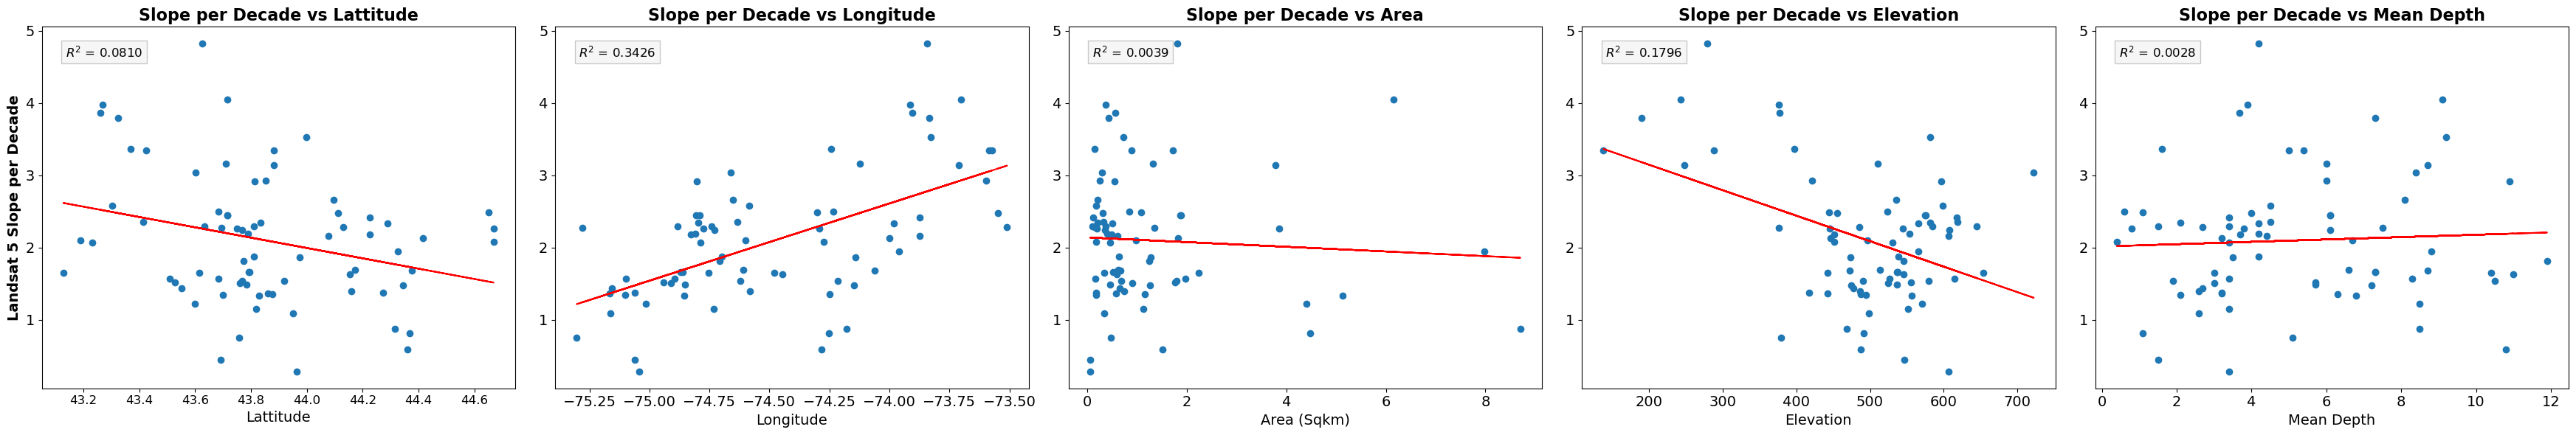

In [64]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define a function to calculate R-squared and plot the line of best fit
def plot_line_of_best_fit(x, y, ax):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color='red')
    ax.text(0.05, 0.95, f'$R^2$ = {r_value**2:.4f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='lightgray', alpha=0.2))

# Filter data based on conditions
merged_data_filtered = merged_data_135_with_cslap[(merged_data_135_with_cslap['AREA (Sqkm)'] <= 15) & 
                                                   (merged_data_135_with_cslap['ELEVATION'] <= 1200) & 
                                                   (merged_data_135_with_cslap['MEAN_DEPTH'] <= 15)]

# Create a Landsat 5 plot of Slope per decade
plt.figure(figsize=(35, 6))

# Subplot 1: Slope per Decade vs Lattitude
ax1 = plt.subplot(1, 5, 1)
plt.scatter(merged_data_filtered['LATTITUDE'], merged_data_filtered['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Lattitude', fontsize=16, fontweight='bold')
plt.xlabel('Lattitude', fontsize=14)
plt.ylabel('Landsat 5 Slope per Decade', fontsize=14, fontweight='bold')
plot_line_of_best_fit(merged_data_filtered['LATTITUDE'], merged_data_filtered['Slope_per_Decade_l5'], ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

# Subplot 2: Slope per Decade vs Longitude
ax2 = plt.subplot(1, 5, 2)
plt.scatter(merged_data_filtered['LONGITUDE'], merged_data_filtered['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Longitude', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['LONGITUDE'], merged_data_filtered['Slope_per_Decade_l5'], ax2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 3: Slope per Decade vs Area
ax3 = plt.subplot(1, 5, 3)
plt.scatter(merged_data_filtered['AREA (Sqkm)'], merged_data_filtered['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (Sqkm)', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['AREA (Sqkm)'], merged_data_filtered['Slope_per_Decade_l5'], ax3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# # Subplot 4: Slope per Decade vs Elevation
# ax4 = plt.subplot(1, 5, 4)
# plt.scatter(merged_data_filtered['ELEVATION'], merged_data_filtered['Slope_per_Decade_l5'])
# plt.title('Slope per Decade vs Elevation', fontsize=16, fontweight='bold')
# plt.xlabel('Elevation', fontsize=14)
# plt.ylabel('Slope per Decade (Landsat 5)', fontsize=14)
# # Adjust x-axis scaling
# ax4.set_xscale('log')
# # Plot line of best fit
# x = merged_data_filtered['ELEVATION']
# y = merged_data_filtered['Slope_per_Decade_l5']
# slope, intercept, r_value, p_value, std_err = linregress(np.log10(x), y)
# line = slope * np.log10(x) + intercept
# ax4.plot(x, line, color='red', label=f'Fit: {slope:.2f} * log(Elevation) + {intercept:.2f}')
# ax4.legend()
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# Subplot 4: Slope per Decade vs Elevation
ax4 = plt.subplot(1, 5, 4)
plt.scatter(merged_data_filtered['ELEVATION'], merged_data_filtered['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Elevation', fontsize=16, fontweight='bold')
plt.xlabel('Elevation', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['ELEVATION'], merged_data_filtered['Slope_per_Decade_l5'], ax4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Subplot 5: Slope per Decade vs Mean Depth
ax5 = plt.subplot(1, 5, 5)
plt.scatter(merged_data_filtered['MEAN_DEPTH'], merged_data_filtered['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Mean Depth', fontsize=16, fontweight='bold')
plt.xlabel('Mean Depth', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['MEAN_DEPTH'], merged_data_filtered['Slope_per_Decade_l5'], ax5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


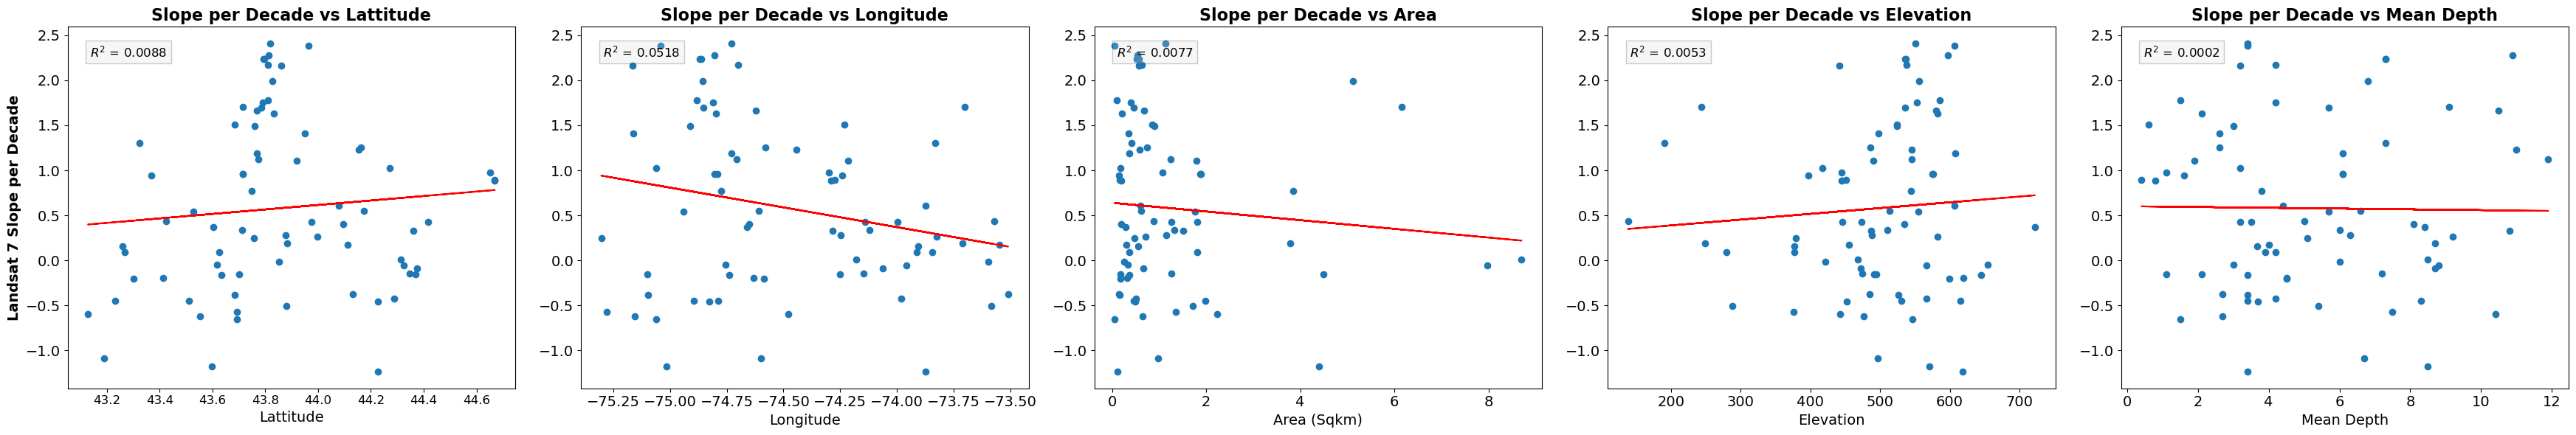

In [66]:
import numpy as np
from scipy.stats import linregress

# Define a function to calculate R-squared and plot the line of best fit
def plot_line_of_best_fit(x, y, ax):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color='red')
    ax.text(0.05, 0.95, f'$R^2$ = {r_value**2:.4f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='lightgray', alpha=0.2))

# Filter data based on conditions
merged_data_filtered = merged_data_135_with_cslap[(merged_data_135_with_cslap['AREA (Sqkm)'] <= 15) & 
                                                   (merged_data_135_with_cslap['ELEVATION'] <= 1200) & 
                                                   (merged_data_135_with_cslap['MEAN_DEPTH'] <= 15)]

# Create a Landsat 5 plot of Slope per decade
plt.figure(figsize=(35, 6))

# Subplot 1: Slope per Decade vs Lattitude
ax1 = plt.subplot(1, 5, 1)
plt.scatter(merged_data_filtered['LATTITUDE'], merged_data_filtered['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Lattitude', fontsize=16, fontweight='bold')
plt.xlabel('Lattitude', fontsize=14)
plt.ylabel('Landsat 7 Slope per Decade', fontsize=14, fontweight='bold')
plot_line_of_best_fit(merged_data_filtered['LATTITUDE'], merged_data_filtered['Slope_per_Decade_l7'], ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

# Subplot 2: Slope per Decade vs Longitude
ax2 = plt.subplot(1, 5, 2)
plt.scatter(merged_data_filtered['LONGITUDE'], merged_data_filtered['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Longitude', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['LONGITUDE'], merged_data_filtered['Slope_per_Decade_l7'], ax2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 3: Slope per Decade vs Area
ax3 = plt.subplot(1, 5, 3)
plt.scatter(merged_data_filtered['AREA (Sqkm)'], merged_data_filtered['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (Sqkm)', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['AREA (Sqkm)'], merged_data_filtered['Slope_per_Decade_l7'], ax3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 4: Slope per Decade vs Elevation
ax4 = plt.subplot(1, 5, 4)
plt.scatter(merged_data_filtered['ELEVATION'], merged_data_filtered['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Elevation', fontsize=16, fontweight='bold')
plt.xlabel('Elevation', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['ELEVATION'], merged_data_filtered['Slope_per_Decade_l7'], ax4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 5: Slope per Decade vs Mean Depth
ax5 = plt.subplot(1, 5, 5)
plt.scatter(merged_data_filtered['MEAN_DEPTH'], merged_data_filtered['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Mean Depth', fontsize=16, fontweight='bold')
plt.xlabel('Mean Depth', fontsize=14)
plot_line_of_best_fit(merged_data_filtered['MEAN_DEPTH'], merged_data_filtered['Slope_per_Decade_l7'], ax5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


## Annual Slope per Decade vs 182 Lake Paramters

In [29]:
import pandas as pd
coord_file_path = r"C:\Users\aisha\Downloads\significant_slopes_L7_182_ANUUAL_5152024_PARAMETER.csv"
Landsat_7_182_LAKES = pd.read_csv(coord_file_path)
Landsat_7_182_LAKES.dropna(inplace=True)
Landsat_7_182_LAKES

,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,47719887,Siamese Ponds,Annual,1.498238,0.457265,0.071938,9.914551
1,47721350,Fawn Lake,Annual,-0.898736,0.524567,-0.053455,11.295346
2,47721625,Sacandaga Lake,Annual,-0.957276,0.507021,-0.055344,11.031635
3,47721785,Lake Pleasant,Annual,-0.261013,0.862314,-0.014683,11.460450
4,47722059,Oxbow Lake,Annual,-0.825139,0.562289,-0.048683,12.344033
...,...,...,...,...,...,...,...
177,150563206,Lower Saranac Lake,Annual,0.096924,0.937390,0.006033,11.601908
178,150679585,Raquette Lake,Annual,1.251740,0.355505,0.069859,10.921342
179,150679605,Forked Lake,Annual,1.986586,0.151650,0.114231,11.064277
180,150679607,Long Lake,Annual,-0.190040,0.887322,-0.010665,10.568875


In [30]:
import pandas as pd
coord_file_path = r"C:\Users\aisha\Downloads\significant_slopes_L5_182_ANUUAL_5152024_PARAMETER.csv"
Landsat_5_182_LAKES = pd.read_csv(coord_file_path)
Landsat_5_182_LAKES.dropna(inplace=True)
Landsat_5_182_LAKES

,Lake_ID,Lake_name,Month,Slope_per_Decade,P-value,R-value,Temp_satellite
0,47719887,Siamese Ponds,Annual,4.150268,0.001347,0.274181,9.883201
1,47721350,Fawn Lake,Annual,1.683291,0.150605,0.105243,10.888126
2,47721625,Sacandaga Lake,Annual,2.064646,0.062992,0.134800,10.625411
3,47721785,Lake Pleasant,Annual,2.545169,0.034437,0.157747,10.591155
4,47722059,Oxbow Lake,Annual,1.629211,0.202489,0.093877,10.369125
...,...,...,...,...,...,...,...
177,150563206,Lower Saranac Lake,Annual,0.942840,0.410763,0.059233,9.518076
178,150679585,Raquette Lake,Annual,2.130898,0.053577,0.130922,9.688391
179,150679605,Forked Lake,Annual,1.992816,0.103336,0.117915,9.385162
180,150679607,Long Lake,Annual,1.802293,0.122769,0.105818,8.972671


In [31]:
import pandas as pd

# Merge Landsat_7_135_LAKES and Landsat_5_135_LAKES on the column "Lake_ID"
merged_data_182 = pd.merge(Landsat_7_182_LAKES, Landsat_5_182_LAKES, on='Lake_ID', suffixes=('_l7', '_l5'))

# Rename the columns for clarity
merged_data_182.rename(columns={'temp_satellite_l7': 'temp_satellite_l7', 
                                 'PERMANENT_ID_l7': 'PERMANENT_ID_l7', 
                                 'SITE_NAME_l7': 'SITE_NAME_l7', 
                                 'Lon_l7': 'Lon_l7', 
                                 'Lat_l7': 'Lat_l7',
                                 'temp_satellite_l5': 'temp_satellite_l5', 
                                 'PERMANENT_ID_l5': 'PERMANENT_ID_l5', 
                                 'SITE_NAME_l5': 'SITE_NAME_l5', 
                                 'Lon_l5': 'Lon_l5', 
                                 'Lat_l5': 'Lat_l5'}, inplace=True)


# Display the merged dataframe
merged_data_182

,Lake_ID,Lake_name_l7,Month_l7,Slope_per_Decade_l7,P-value_l7,R-value_l7,Temp_satellite_l7,Lake_name_l5,Month_l5,Slope_per_Decade_l5,P-value_l5,R-value_l5,Temp_satellite_l5
0,47719887,Siamese Ponds,Annual,1.498238,0.457265,0.071938,9.914551,Siamese Ponds,Annual,4.150268,0.001347,0.274181,9.883201
1,47721350,Fawn Lake,Annual,-0.898736,0.524567,-0.053455,11.295346,Fawn Lake,Annual,1.683291,0.150605,0.105243,10.888126
2,47721625,Sacandaga Lake,Annual,-0.957276,0.507021,-0.055344,11.031635,Sacandaga Lake,Annual,2.064646,0.062992,0.134800,10.625411
3,47721785,Lake Pleasant,Annual,-0.261013,0.862314,-0.014683,11.460450,Lake Pleasant,Annual,2.545169,0.034437,0.157747,10.591155
4,47722059,Oxbow Lake,Annual,-0.825139,0.562289,-0.048683,12.344033,Oxbow Lake,Annual,1.629211,0.202489,0.093877,10.369125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,150563206,Lower Saranac Lake,Annual,0.096924,0.937390,0.006033,11.601908,Lower Saranac Lake,Annual,0.942840,0.410763,0.059233,9.518076
178,150679585,Raquette Lake,Annual,1.251740,0.355505,0.069859,10.921342,Raquette Lake,Annual,2.130898,0.053577,0.130922,9.688391
179,150679605,Forked Lake,Annual,1.986586,0.151650,0.114231,11.064277,Forked Lake,Annual,1.992816,0.103336,0.117915,9.385162
180,150679607,Long Lake,Annual,-0.190040,0.887322,-0.010665,10.568875,Long Lake,Annual,1.802293,0.122769,0.105818,8.972671


In [32]:
import pandas as pd

# Load the CSV file into a DataFrame
cslap_aeap_135_lakes = pd.read_csv(r'C:\Users\aisha\Downloads\cslap_aeap_135_lakes_harmonized.csv')

# Convert 'Lake_ID' column to object type if it's of type int64
if merged_data_182['Lake_ID'].dtype == 'int64':
    merged_data_182['Lake_ID'] = merged_data_182['Lake_ID'].astype(str)

# Merge merged_data_182 with cslap_aeap_135_lakes based on 'Lake_ID' and 'PERMANENT_ID'
merged_data_182_with_cslap = pd.merge(merged_data_182, cslap_aeap_135_lakes, left_on='Lake_ID', right_on='PERMANENT_ID', how='left')

# Drop the duplicate 'PERMANENT_ID' column
merged_data_182_with_cslap.drop(columns=['PERMANENT_ID'], inplace=True)

# Display the merged dataframe
merged_data_182_with_cslap

,Lake_ID,Lake_name_l7,Month_l7,Slope_per_Decade_l7,P-value_l7,R-value_l7,Temp_satellite_l7,Lake_name_l5,Month_l5,Slope_per_Decade_l5,P-value_l5,R-value_l5,Temp_satellite_l5,LAKE_NAME,LATTITUDE,LONGITUDE,DATA_PROVIDER,AREA (Sqkm),ELEVATION,MEAN_DEPTH
0,47719887,Siamese Ponds,Annual,1.498238,0.457265,0.071938,9.914551,Siamese Ponds,Annual,4.150268,0.001347,0.274181,9.883201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47721350,Fawn Lake,Annual,-0.898736,0.524567,-0.053455,11.295346,Fawn Lake,Annual,1.683291,0.150605,0.105243,10.888126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47721625,Sacandaga Lake,Annual,-0.957276,0.507021,-0.055344,11.031635,Sacandaga Lake,Annual,2.064646,0.062992,0.134800,10.625411,SACANDAGA LAKE,43.480598,-74.421700,CSL,6.507445,NaN,8.5
3,47721785,Lake Pleasant,Annual,-0.261013,0.862314,-0.014683,11.460450,Lake Pleasant,Annual,2.545169,0.034437,0.157747,10.591155,LAKE PLEASANT,43.487202,-74.363800,CSL,5.971978,NaN,NaN
4,47722059,Oxbow Lake,Annual,-0.825139,0.562289,-0.048683,12.344033,Oxbow Lake,Annual,1.629211,0.202489,0.093877,10.369125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,150563206,Lower Saranac Lake,Annual,0.096924,0.937390,0.006033,11.601908,Lower Saranac Lake,Annual,0.942840,0.410763,0.059233,9.518076,LOWER SARANAC LAKE,44.314595,-74.178966,LCI,8.704724,468.0,8.5
180,150679585,Raquette Lake,Annual,1.251740,0.355505,0.069859,10.921342,Raquette Lake,Annual,2.130898,0.053577,0.130922,9.688391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,150679605,Forked Lake,Annual,1.986586,0.151650,0.114231,11.064277,Forked Lake,Annual,1.992816,0.103336,0.117915,9.385162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,150679607,Long Lake,Annual,-0.190040,0.887322,-0.010665,10.568875,Long Lake,Annual,1.802293,0.122769,0.105818,8.972671,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
import pandas as pd

# Read the CSV file
csv_file_path = r"C:\Users\aisha\Downloads\182_lakes_updated_coordinates.csv"
lakes_182 = pd.read_csv(csv_file_path)

# Drop the 'Lat', 'Lon', and 'Lattitude' columns
lakes_182.drop(columns=['Lat', 'Lon', 'Lattitude', 'wkt_geom', 'W', 'L'], inplace=True)

# Rename columns
lakes_182.rename(columns={'PERMANENT_': 'PERMANENT_ID', 'Lattitude_': 'Lat', 'Longitude_': 'Lon', 'lake.name':'SITE_NAME'}, inplace=True)

# Print the resulting DataFrame
lakes_182

,PERMANENT_ID,SITE_NAME,Lat,Lon
0,47725041,Silver Lake,43.294298,-74.429060
1,131844984,Limekiln Lake,43.712164,-74.798791
2,53542293,Canada Lake,43.166322,-74.530215
3,120023153,Piseco Lake,43.420732,-74.535786
4,53541207,Hinckley Reservoir,43.336330,-75.075211
...,...,...,...,...
177,132436448,Clear Pond,44.040612,-74.763285
178,131841654,Shingle Shanty Pond,43.916438,-74.780530
179,131846637,Chub Pond,43.527324,-75.045971
180,53540721,The Floe,43.400910,-74.703971


In [34]:
import pandas as pd

# Assuming merged_data_182_with_cslap and lakes_182 are DataFrames loaded previously

# Convert 'Lake_ID' column in merged_data_182_with_cslap to object type if it's of type int64
if merged_data_182_with_cslap['Lake_ID'].dtype == 'int64':
    merged_data_182_with_cslap['Lake_ID'] = merged_data_182_with_cslap['Lake_ID'].astype(str)

# Convert 'PERMANENT_ID' column in lakes_182 to object type if it's of type int64
if lakes_182['PERMANENT_ID'].dtype == 'int64':
    lakes_182['PERMANENT_ID'] = lakes_182['PERMANENT_ID'].astype(str)

# Merge merged_data_182_with_cslap with lakes_182 based on 'Lake_ID' and 'PERMANENT_ID'
final_merged_data = pd.merge(merged_data_182_with_cslap, lakes_182, left_on='Lake_ID', right_on='PERMANENT_ID', how='left')

# Drop the duplicate 'PERMANENT_ID' column
final_merged_data.drop(columns=['PERMANENT_ID'], inplace=True)

# Display the final merged dataframe
final_merged_data

,Lake_ID,Lake_name_l7,Month_l7,Slope_per_Decade_l7,P-value_l7,R-value_l7,Temp_satellite_l7,Lake_name_l5,Month_l5,Slope_per_Decade_l5,...,LAKE_NAME,LATTITUDE,LONGITUDE,DATA_PROVIDER,AREA (Sqkm),ELEVATION,MEAN_DEPTH,SITE_NAME,Lat,Lon
0,47719887,Siamese Ponds,Annual,1.498238,0.457265,0.071938,9.914551,Siamese Ponds,Annual,4.150268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Siamese Ponds,43.618551,-74.183812
1,47721350,Fawn Lake,Annual,-0.898736,0.524567,-0.053455,11.295346,Fawn Lake,Annual,1.683291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fawn Lake,43.488765,-74.455094
2,47721625,Sacandaga Lake,Annual,-0.957276,0.507021,-0.055344,11.031635,Sacandaga Lake,Annual,2.064646,...,SACANDAGA LAKE,43.480598,-74.421700,CSL,6.507445,NaN,8.5,Sacandaga Lake,43.483084,-74.419641
3,47721785,Lake Pleasant,Annual,-0.261013,0.862314,-0.014683,11.460450,Lake Pleasant,Annual,2.545169,...,LAKE PLEASANT,43.487202,-74.363800,CSL,5.971978,NaN,NaN,Lake Pleasant,43.486671,-74.361922
4,47722059,Oxbow Lake,Annual,-0.825139,0.562289,-0.048683,12.344033,Oxbow Lake,Annual,1.629211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxbow Lake,43.445504,-74.477612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,150563206,Lower Saranac Lake,Annual,0.096924,0.937390,0.006033,11.601908,Lower Saranac Lake,Annual,0.942840,...,LOWER SARANAC LAKE,44.314595,-74.178966,LCI,8.704724,468.0,8.5,Lower Saranac Lake,44.315173,-74.182712
180,150679585,Raquette Lake,Annual,1.251740,0.355505,0.069859,10.921342,Raquette Lake,Annual,2.130898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Raquette Lake,43.838640,-74.640205
181,150679605,Forked Lake,Annual,1.986586,0.151650,0.114231,11.064277,Forked Lake,Annual,1.992816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forked Lake,43.896225,-74.588207
182,150679607,Long Lake,Annual,-0.190040,0.887322,-0.010665,10.568875,Long Lake,Annual,1.802293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long Lake,44.014891,-74.384389


In [35]:
import pandas as pd

# Load the "lagoes_adk_modified.csv" file into a DataFrame
lagoes_adk_modified = pd.read_csv(r'C:\Users\aisha\Downloads\lagoes_adk_modified.csv')

# Convert the "Permanent_" column to object type if it's of type int64
if lagoes_adk_modified['Permanent_'].dtype == 'int64':
    lagoes_adk_modified['Permanent_'] = lagoes_adk_modified['Permanent_'].astype(str)

# Convert the "Lake_ID" column in final_merged_data to object type
final_merged_data['Lake_ID'] = final_merged_data['Lake_ID'].astype(str)

# Merge final_merged_data with lagoes_adk_modified based on 'Lake_ID' and 'Permanent_'
merged_final_data = pd.merge(final_merged_data, lagoes_adk_modified, left_on='Lake_ID', right_on='Permanent_')

# Drop the duplicate 'Permanent_' column
merged_final_data.drop(columns=['Permanent_'], inplace=True)

# Drop duplicates based on the "Lake_ID" column
merged_final_data.drop_duplicates(subset=['Lake_ID'], inplace=True)

# Display the merged dataframe
merged_final_data

,Lake_ID,Lake_name_l7,Month_l7,Slope_per_Decade_l7,P-value_l7,R-value_l7,Temp_satellite_l7,Lake_name_l5,Month_l5,Slope_per_Decade_l5,...,Unnamed: 3,chla,colort,doc,secchi,nhd_lat,nhd_long,lagosname1,meandepth,maxdepth
0,47719887,Siamese Ponds,Annual,1.498238,0.457265,0.071938,9.914551,Siamese Ponds,Annual,4.150268,...,NaN,NaN,10.0,3.50,NaN,43.618551,-74.183812,SIAMESE POND (LOWER),9.0000,24.0000
1,47721350,Fawn Lake,Annual,-0.898736,0.524567,-0.053455,11.295346,Fawn Lake,Annual,1.683291,...,NaN,NaN,10.0,3.50,NaN,43.488765,-74.455094,FAWN LAKE,10.0000,19.0000
2,47721625,Sacandaga Lake,Annual,-0.957276,0.507021,-0.055344,11.031635,Sacandaga Lake,Annual,2.064646,...,NaN,2.7,26.0,NaN,3.28,43.489061,-74.422500,SACANDAGA LAKE,8.5000,19.0000
115,47721785,Lake Pleasant,Annual,-0.261013,0.862314,-0.014683,11.460450,Lake Pleasant,Annual,2.545169,...,NaN,3.3,17.0,NaN,5.00,43.477576,-74.377514,Lake Pleasant,NaN,19.0000
118,47722059,Oxbow Lake,Annual,-0.825139,0.562289,-0.048683,12.344033,Oxbow Lake,Annual,1.629211,...,NaN,NaN,40.0,5.48,2.45,43.441346,-74.483329,NaN,NaN,3.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,150563206,Lower Saranac Lake,Annual,0.096924,0.937390,0.006033,11.601908,Lower Saranac Lake,Annual,0.942840,...,NaN,13.3,14.0,NaN,4.00,44.302456,-74.192367,Lower Saranac Lake,NaN,15.0000
5582,150679585,Raquette Lake,Annual,1.251740,0.355505,0.069859,10.921342,Raquette Lake,Annual,2.130898,...,NaN,NaN,15.0,4.90,NaN,43.843237,-74.635321,ELDON LAKE,13.4112,27.4320
5583,150679605,Forked Lake,Annual,1.986586,0.151650,0.114231,11.064277,Forked Lake,Annual,1.992816,...,NaN,NaN,35.0,3.75,2.40,43.900822,-74.574415,NaN,NaN,22.5552
5584,150679607,Long Lake,Annual,-0.190040,0.887322,-0.010665,10.568875,Long Lake,Annual,1.802293,...,NaN,NaN,9.0,4.23,3.00,44.015130,-74.387971,LONG LAKE,3.3000,13.7000


In [36]:
print(merged_final_data.columns)

Index(['Lake_ID', 'Lake_name_l7', 'Month_l7', 'Slope_per_Decade_l7',
       'P-value_l7', 'R-value_l7', 'Temp_satellite_l7', 'Lake_name_l5',
       'Month_l5', 'Slope_per_Decade_l5', 'P-value_l5', 'R-value_l5',
       'Temp_satellite_l5', 'LAKE_NAME', 'LATTITUDE', 'LONGITUDE',
       'DATA_PROVIDER', 'AREA (Sqkm)', 'ELEVATION', 'MEAN_DEPTH', 'SITE_NAME',
       'Lat', 'Lon', '0', 'lagoslakeid', 'sampledate', 'Unnamed: 3', 'chla',
       'colort', 'doc', 'secchi', 'nhd_lat', 'nhd_long', 'lagosname1',
       'meandepth', 'maxdepth'],
      dtype='object')


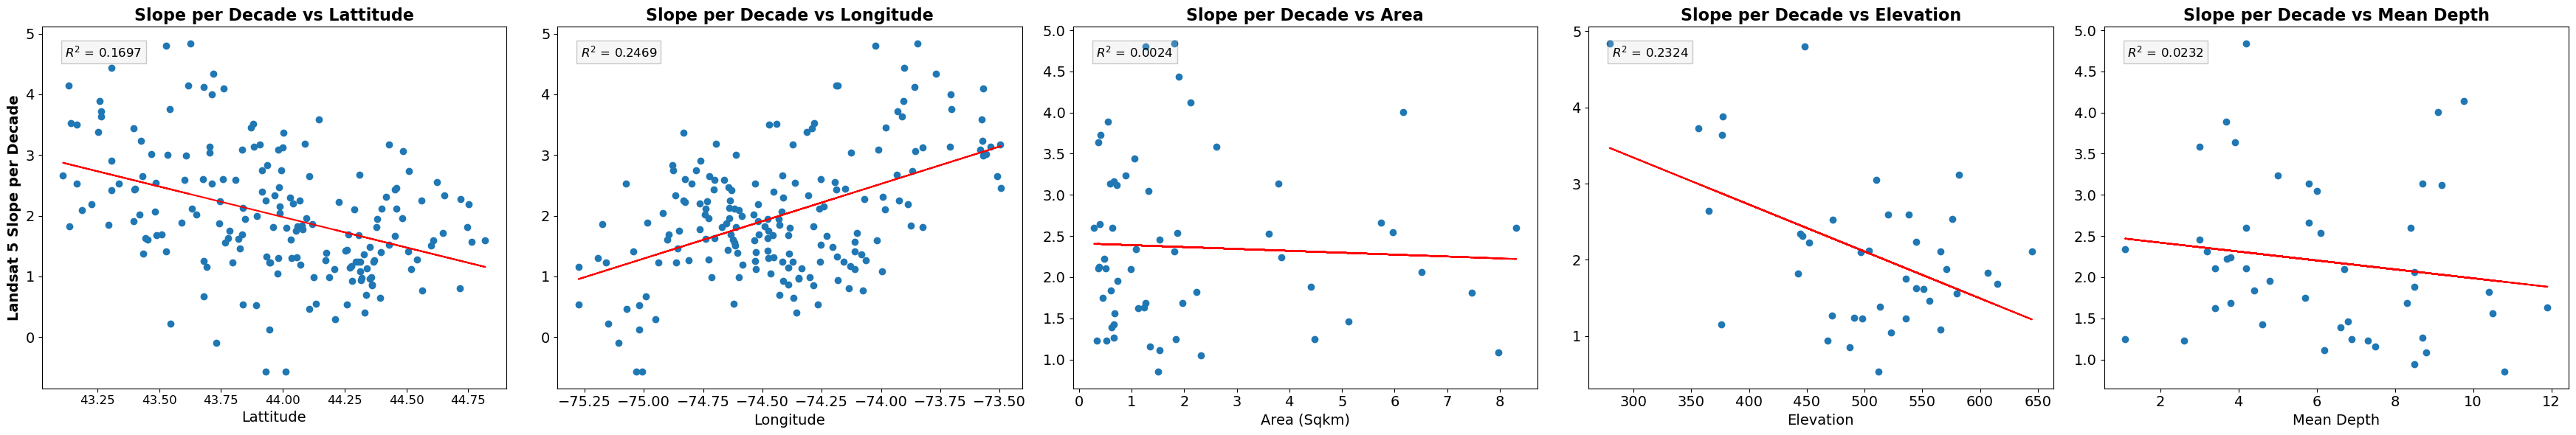

In [67]:
import numpy as np
from scipy.stats import linregress

# Define a function to calculate R-squared and plot the line of best fit
def plot_line_of_best_fit(x, y, ax):
    non_nan_indices = ~np.isnan(x) & ~np.isnan(y)  # Filter out NaN values
    x_filtered = x[non_nan_indices]
    y_filtered = y[non_nan_indices]
    
    slope, intercept, r_value, p_value, std_err = linregress(x_filtered, y_filtered)
    line = slope * x_filtered + intercept
    ax.plot(x_filtered, line, color='red')
    ax.text(0.05, 0.95, f'$R^2$ = {r_value**2:.4f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='lightgray', alpha=0.2))

# Create a Landsat 5 plot of Slope per decade
plt.figure(figsize=(35, 6))

# Subplot 1: Slope per Decade vs Lattitude
ax1 = plt.subplot(1, 5, 1)
plt.scatter(merged_final_data['Lat'], merged_final_data['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Lattitude', fontsize=16, fontweight='bold')
plt.xlabel('Lattitude', fontsize=14)
plt.ylabel('Landsat 5 Slope per Decade', fontsize=14, fontweight='bold')
plot_line_of_best_fit(merged_final_data['Lat'], merged_final_data['Slope_per_Decade_l5'], ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

# Subplot 2: Slope per Decade vs Longitude
ax2 = plt.subplot(1, 5, 2)
plt.scatter(merged_final_data['Lon'], merged_final_data['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Longitude', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plot_line_of_best_fit(merged_final_data['Lon'], merged_final_data['Slope_per_Decade_l5'], ax2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Filter 'AREA (Sqkm)' column for values less than 30
Q1 = merged_final_data['AREA (Sqkm)'].quantile(0.25)
Q3 = merged_final_data['AREA (Sqkm)'].quantile(0.75)
IQR = Q3 - Q1
filtered_area_data = merged_final_data[(merged_final_data['AREA (Sqkm)'] >= Q1 - 1.5 * IQR) & 
                                       (merged_final_data['AREA (Sqkm)'] <= Q3 + 1.5 * IQR)]

# Subplot 3: Slope per Decade vs Area
ax3 = plt.subplot(1, 5, 3)
plt.scatter(filtered_area_data['AREA (Sqkm)'], filtered_area_data['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (Sqkm)', fontsize=14)
plot_line_of_best_fit(filtered_area_data['AREA (Sqkm)'], filtered_area_data['Slope_per_Decade_l5'], ax3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Subplot 4: Slope per Decade vs Elevation
ax4 = plt.subplot(1, 5, 4)
# Remove outliers using IQR method for ELEVATION
Q1 = merged_final_data['ELEVATION'].quantile(0.25)
Q3 = merged_final_data['ELEVATION'].quantile(0.75)
IQR = Q3 - Q1
filtered_elevation_data = merged_final_data[(merged_final_data['ELEVATION'] >= Q1 - 1.5 * IQR) & 
                                            (merged_final_data['ELEVATION'] <= Q3 + 1.5 * IQR)]
plt.scatter(filtered_elevation_data['ELEVATION'], filtered_elevation_data['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Elevation', fontsize=16, fontweight='bold')
plt.xlabel('Elevation', fontsize=14)
plot_line_of_best_fit(filtered_elevation_data['ELEVATION'], filtered_elevation_data['Slope_per_Decade_l5'], ax4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 5: Slope per Decade vs Mean Depth
ax5 = plt.subplot(1, 5, 5)
# Remove outliers using IQR method for MEAN_DEPTH
Q1 = merged_final_data['MEAN_DEPTH'].quantile(0.25)
Q3 = merged_final_data['MEAN_DEPTH'].quantile(0.75)
IQR = Q3 - Q1
filtered_mean_depth_data = merged_final_data[(merged_final_data['MEAN_DEPTH'] >= Q1 - 1.5 * IQR) & 
                                             (merged_final_data['MEAN_DEPTH'] <= Q3 + 1.5 * IQR)]
plt.scatter(filtered_mean_depth_data['MEAN_DEPTH'], filtered_mean_depth_data['Slope_per_Decade_l5'])
plt.title('Slope per Decade vs Mean Depth', fontsize=16, fontweight='bold')
plt.xlabel('Mean Depth', fontsize=14)
plot_line_of_best_fit(filtered_mean_depth_data['MEAN_DEPTH'], filtered_mean_depth_data['Slope_per_Decade_l5'], ax5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


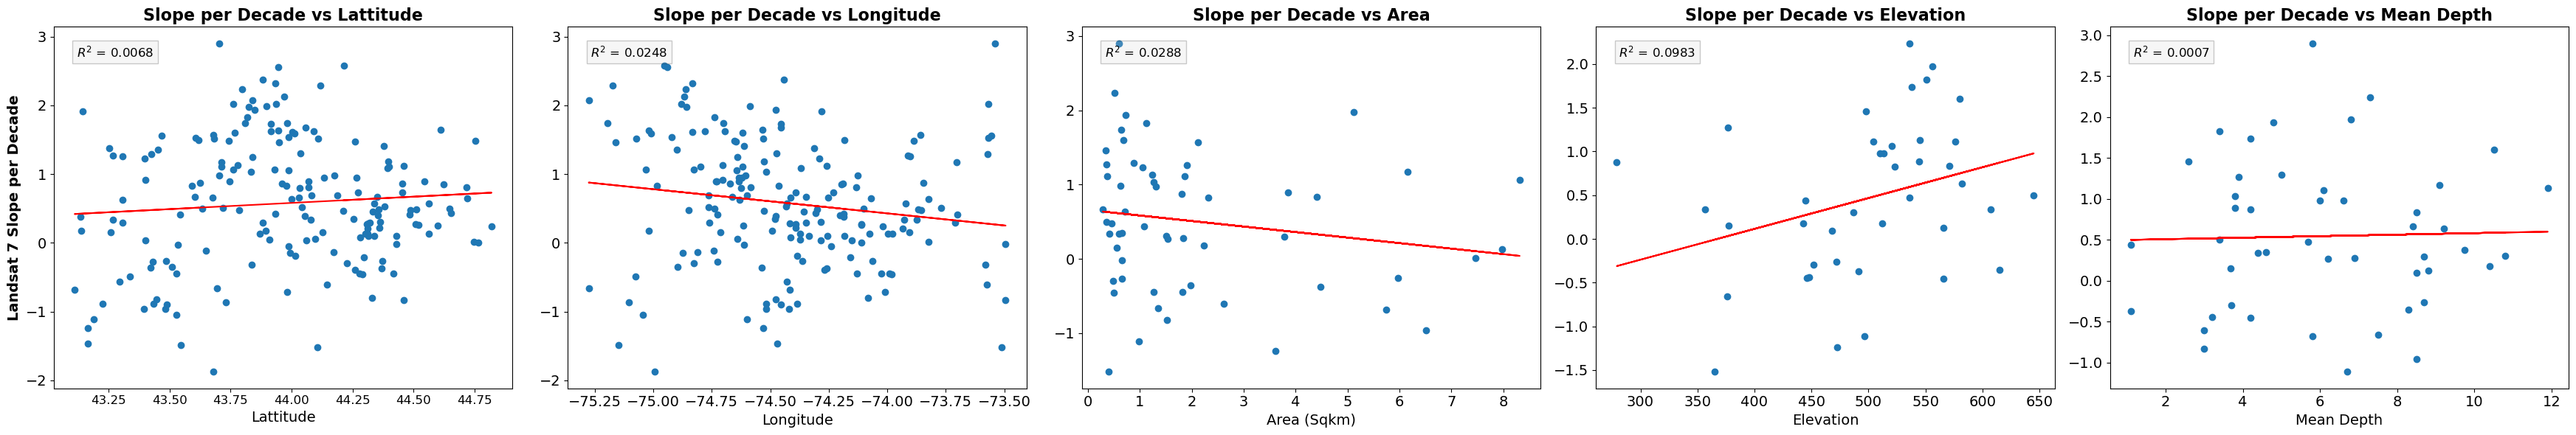

In [68]:
import numpy as np
from scipy.stats import linregress

# Define a function to calculate R-squared and plot the line of best fit
def plot_line_of_best_fit(x, y, ax):
    non_nan_indices = ~np.isnan(x) & ~np.isnan(y)  # Filter out NaN values
    x_filtered = x[non_nan_indices]
    y_filtered = y[non_nan_indices]
    
    slope, intercept, r_value, p_value, std_err = linregress(x_filtered, y_filtered)
    line = slope * x_filtered + intercept
    ax.plot(x_filtered, line, color='red')
    ax.text(0.05, 0.95, f'$R^2$ = {r_value**2:.4f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='lightgray', alpha=0.2))

# Create a Landsat 5 plot of Slope per decade
plt.figure(figsize=(35, 6))

# Subplot 1: Slope per Decade vs Lattitude
ax1 = plt.subplot(1, 5, 1)
plt.scatter(merged_final_data['Lat'], merged_final_data['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Lattitude', fontsize=16, fontweight='bold')
plt.xlabel('Lattitude', fontsize=14)
plt.ylabel('Landsat 7 Slope per Decade', fontsize=14, fontweight='bold')
plot_line_of_best_fit(merged_final_data['Lat'], merged_final_data['Slope_per_Decade_l7'], ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

# Subplot 2: Slope per Decade vs Longitude
ax2 = plt.subplot(1, 5, 2)
plt.scatter(merged_final_data['Lon'], merged_final_data['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Longitude', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plot_line_of_best_fit(merged_final_data['Lon'], merged_final_data['Slope_per_Decade_l7'], ax2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Filter 'AREA (Sqkm)' column for values less than 30
Q1_area = merged_final_data['AREA (Sqkm)'].quantile(0.25)
Q3_area = merged_final_data['AREA (Sqkm)'].quantile(0.75)
IQR_area = Q3_area - Q1_area
filtered_area_data = merged_final_data[(merged_final_data['AREA (Sqkm)'] >= Q1_area - 1.5 * IQR_area) & 
                                       (merged_final_data['AREA (Sqkm)'] <= Q3_area + 1.5 * IQR_area)]

# Subplot 3: Slope per Decade vs Area
ax3 = plt.subplot(1, 5, 3)
plt.scatter(filtered_area_data['AREA (Sqkm)'], filtered_area_data['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Area', fontsize=16, fontweight='bold')
plt.xlabel('Area (Sqkm)', fontsize=14)
plot_line_of_best_fit(filtered_area_data['AREA (Sqkm)'], filtered_area_data['Slope_per_Decade_l7'], ax3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Filter 'ELEVATION' column for outliers
Q1_elevation = merged_final_data['ELEVATION'].quantile(0.25)
Q3_elevation = merged_final_data['ELEVATION'].quantile(0.75)
IQR_elevation = Q3_elevation - Q1_elevation
filtered_elevation_data = merged_final_data[(merged_final_data['ELEVATION'] >= Q1_elevation - 1.5 * IQR_elevation) & 
                                            (merged_final_data['ELEVATION'] <= Q3_elevation + 1.5 * IQR_elevation)]

# Subplot 4: Slope per Decade vs Elevation
ax4 = plt.subplot(1, 5, 4)
plt.scatter(filtered_elevation_data['ELEVATION'], filtered_elevation_data['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Elevation', fontsize=16, fontweight='bold')
plt.xlabel('Elevation', fontsize=14)
plot_line_of_best_fit(filtered_elevation_data['ELEVATION'], filtered_elevation_data['Slope_per_Decade_l7'], ax4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Filter 'MEAN_DEPTH' column for outliers
Q1_mean_depth = merged_final_data['MEAN_DEPTH'].quantile(0.25)
Q3_mean_depth = merged_final_data['MEAN_DEPTH'].quantile(0.75)
IQR_mean_depth = Q3_mean_depth - Q1_mean_depth
filtered_mean_depth_data = merged_final_data[(merged_final_data['MEAN_DEPTH'] >= Q1_mean_depth - 1.5 * IQR_mean_depth) & 
                                             (merged_final_data['MEAN_DEPTH'] <= Q3_mean_depth + 1.5 * IQR_mean_depth)]

# Subplot 5: Slope per Decade vs Mean Depth
ax5 = plt.subplot(1, 5, 5)
plt.scatter(filtered_mean_depth_data['MEAN_DEPTH'], filtered_mean_depth_data['Slope_per_Decade_l7'])
plt.title('Slope per Decade vs Mean Depth', fontsize=16, fontweight='bold')
plt.xlabel('Mean Depth', fontsize=14)
plot_line_of_best_fit(filtered_mean_depth_data['MEAN_DEPTH'], filtered_mean_depth_data['Slope_per_Decade_l7'], ax5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()